# ÂèÇËÄÉË≥áÊñô
„Éô„Éº„Çπ
https://signate.jp/competitions/402/discussions/lgbm-baseline-except-text-vs-include-text-lb07994-1

1‰ΩçËß£Ê≥ï
https://signate.jp/competitions/402/discussions/120210204

„ÇÑ„Çä„Åç„Çå„Å™„Åã„Å£„Åü„Åì„Å®

Âú∞Âüü„ÉªË®ÄË™ûÂúè„ÅÆ„Ç´„É©„É†„ÄÅ„ÇØ„É©„Çπ„Çø„Å®„ÅÆË∑ùÈõ¢„ÄÅPseudoLabesing„ÄÅÁâπÂæ¥ÈáèÈÅ∏Êäû„ÅÆ‰ªñ„ÅÆÊâãÊ≥ï„ÄÅË®ÄË™ûÂá¶ÁêÜ„ÅÆÈÅï„ÅÑ„Å´„Çà„Çã„Çπ„Çø„ÉÉ„Ç≠„É≥„Ç∞

In [233]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('ggplot')
import os

In [2]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# „Éá„Éº„Çø„ÅÆË™≠„ÅøËæº„Åø

In [3]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
train_df

id         goal country  duration     category1        category2  \
0          0    4001-5000      CH        29    publishing      young adult   
1          1    3001-4000      NL        34       fashion    ready-to-wear   
2          2  19001-20000      US        30          food           spaces   
3          3    2001-3000      US        41    technology      3d printing   
4          4    2001-3000      GB        29    technology  diy electronics   
...      ...          ...     ...       ...           ...              ...   
10540  10540       1-1000      GB        30  film & video     experimental   
10541  10541       1-1000      US        29    journalism              web   
10542  10542  19001-20000      US        33    journalism              web   
10543  10543       1-1000      FR        30        comics      comic books   
10544  10544  74001-75000      US        60          food           spaces   

                                            html_content  state  
0      <div class="contents"><div><span class="bold">...      0  
1      <div class="contents"><div><h1 class="page-anc...      0  
2      <div class="contents"><div><p>¬†As our society ...      0  
3      <div class="contents"><div><p>My name is Donal...      0  
4      <div class="contents"><div><div class="templat...      1  
...                                                  ...    ...  
10540  <div class="contents"><div><h1 class="page-anc...      0  
10541  <div class="contents"><div><p>This past Novemb...      0  
10542  <div class="contents"><div><p><span class="bol...      0  
10543  <div class="contents"><div><h1 class="page-anc...      1  
10544  <div class="contents"><div><p>Do you take your...      0  

[10545 rows x 8 columns]

In [5]:
test_df

id        goal country  duration   category1       category2  \
0      10545      1-1000      US        60       dance    performances   
1      10546   8001-9000      US        30      crafts        printing   
2      10547  9001-10000      US        60      design  product design   
3      10548   1001-2000      US        30  technology        software   
4      10549   4001-5000      US        59  technology        software   
...      ...         ...     ...       ...         ...             ...   
10539  21084  9001-10000      US        30        food          drinks   
10540  21085      1-1000      US        29        food     small batch   
10541  21086   1001-2000      US        27      crafts         pottery   
10542  21087   2001-3000      US        30      design  graphic design   
10543  21088   1001-2000      US        30     fashion   ready-to-wear   

                                            html_content  
0      <div class="contents"><div><p>We are presentin...  
1      <div class="contents"><div><a href="http://dum...  
2      <div class="contents"><div><div class="templat...  
3      <div class="contents"><div><p>This is my video...  
4      <div class="contents"><div><h1 class="page-anc...  
...                                                  ...  
10539  <div class="contents"><div><p>Its time to get ...  
10540  <div class="contents"><div><p>I have been roas...  
10541  <div class="contents"><div><p>¬† ¬† ¬† ¬† ¬†I have ...  
10542  <div class="contents"><div><h1 class="page-anc...  
10543  <div class="contents"><div><p>I have been deve...  

[10544 rows x 7 columns]

In [190]:
# „Éá„Éº„Çø„ÅÆÁµêÂêà
all_df = pd.concat([train_df, test_df])
all_df.reset_index(drop=True, inplace=True)
all_df

id         goal country  duration   category1        category2  \
0          0    4001-5000      CH        29  publishing      young adult   
1          1    3001-4000      NL        34     fashion    ready-to-wear   
2          2  19001-20000      US        30        food           spaces   
3          3    2001-3000      US        41  technology      3d printing   
4          4    2001-3000      GB        29  technology  diy electronics   
...      ...          ...     ...       ...         ...              ...   
21084  21084   9001-10000      US        30        food           drinks   
21085  21085       1-1000      US        29        food      small batch   
21086  21086    1001-2000      US        27      crafts          pottery   
21087  21087    2001-3000      US        30      design   graphic design   
21088  21088    1001-2000      US        30     fashion    ready-to-wear   

                                            html_content  state  
0      <div class="contents"><div><span class="bold">...    0.0  
1      <div class="contents"><div><h1 class="page-anc...    0.0  
2      <div class="contents"><div><p>¬†As our society ...    0.0  
3      <div class="contents"><div><p>My name is Donal...    0.0  
4      <div class="contents"><div><div class="templat...    1.0  
...                                                  ...    ...  
21084  <div class="contents"><div><p>Its time to get ...    NaN  
21085  <div class="contents"><div><p>I have been roas...    NaN  
21086  <div class="contents"><div><p>¬† ¬† ¬† ¬† ¬†I have ...    NaN  
21087  <div class="contents"><div><h1 class="page-anc...    NaN  
21088  <div class="contents"><div><p>I have been deve...    NaN  

[21089 rows x 8 columns]

# EDA

## ÈùûÁõÆÁöÑÂ§âÊï∞

In [191]:
all_df["state"].value_counts()

1.0    5318
0.0    5227
Name: state, dtype: int64

## Ê¨†ÊêçÂÄ§

In [192]:
all_df.isnull().sum()

id                  0
goal                0
country             0
duration            0
category1           0
category2           0
html_content        0
state           10544
dtype: int64

## Âûã

In [193]:
all_df.dtypes

id                int64
goal             object
country          object
duration          int64
category1        object
category2        object
html_content     object
state           float64
dtype: object

## Áµ±Ë®àÈáè

In [194]:
all_df.describe()

id      duration         state
count  21089.000000  21089.000000  10545.000000
mean   10544.000000     32.628195      0.504315
std     6088.014249     12.045661      0.500005
min        0.000000      1.000000      0.000000
25%     5272.000000     29.000000      0.000000
50%    10544.000000     30.000000      1.000000
75%    15816.000000     34.000000      1.000000
max    21088.000000     90.000000      1.000000

## goal

In [195]:
all_df["goal"].value_counts()

1-1000          4436
1001-2000       2457
2001-3000       1954
4001-5000       1735
3001-4000       1403
9001-10000      1123
5001-6000        783
7001-8000        704
14001-15000      633
6001-7000        592
100000+          544
19001-20000      490
24001-25000      396
49001-50000      329
11001-12000      322
8001-9000        285
29001-30000      278
10001-11000      179
12001-13000      179
99001-100000     151
15001-16000      136
17001-18000      123
13001-14000      115
34001-35000      112
39001-40000      104
16001-17000      103
59001-60000       83
21001-22000       72
22001-23000       71
18001-19000       58
74001-75000       58
44001-45000       56
23001-24000       53
26001-27000       51
20001-21000       50
25001-26000       50
64001-65000       39
79001-80000       39
27001-28000       35
54001-55000       35
37001-38000       34
35001-36000       34
38001-39000       33
31001-32000       32
28001-29000       30
32001-33000       29
36001-37000       24
33001-34000  

In [196]:
# „Éï„É©„Ç∞
all_df["goal_upper_flag"] = all_df["goal"] == "100000+"
all_df["goal_lower_flag"] = all_df["goal"] == "1-1000"

# „Éû„ÉÉ„Éî„É≥„Ç∞
dic = {"100000+": "100000-101000"}
all_df["goal"] = all_df["goal"].replace(dic)

# split+Áµ±Ë®àÈáè
all_df["goal_min"] = all_df["goal"].apply(lambda x: x.split("-")[0]).astype(int)
all_df["goal_min"].value_counts()

1         4436
1001      2457
2001      1954
4001      1735
3001      1403
9001      1123
5001       783
7001       704
14001      633
6001       592
100000     544
19001      490
24001      396
49001      329
11001      322
8001       285
29001      278
12001      179
10001      179
99001      151
15001      136
17001      123
13001      115
34001      112
39001      104
16001      103
59001       83
21001       72
22001       71
74001       58
18001       58
44001       56
23001       53
26001       51
20001       50
25001       50
64001       39
79001       39
54001       35
27001       35
37001       34
35001       34
38001       33
31001       32
28001       30
32001       29
33001       24
36001       24
45001       23
30001       23
69001       21
56001       17
47001       16
84001       16
89001       15
40001       14
46001       13
41001       13
57001       13
78001       12
42001       12
53001       11
75001       11
43001       11
52001       11
67001        9
55001     

In [197]:
goal_pivot = all_df.pivot_table(index="goal_min", values="state", aggfunc=["mean","count"])
goal_pivot

mean count
             state state
goal_min                
1         0.632680  2246
1001      0.595142  1235
2001      0.569122   991
3001      0.597122   695
4001      0.539863   878
5001      0.567282   379
6001      0.542373   295
7001      0.515152   330
8001      0.525180   139
9001      0.430909   550
10001     0.379747    79
11001     0.538462   169
12001     0.417582    91
13001     0.433333    60
14001     0.447099   293
15001     0.393939    66
16001     0.352941    51
17001     0.305085    59
18001     0.406250    32
19001     0.308696   230
20001     0.583333    24
21001     0.250000    40
22001     0.457143    35
23001     0.250000    28
24001     0.339806   206
25001     0.346154    26
26001     0.413793    29
27001     0.434783    23
28001     0.266667    15
29001     0.294521   146
30001     0.272727    11
31001     0.388889    18
32001     0.200000    10
33001     0.333333    12
34001     0.407407    54
35001     0.062500    16
36001     0.454545    11
37001     0.166667    18
38001     0.176471    17
39001     0.386364    44
40001     0.166667     6
41001     0.090909    11
42001     0.285714     7
43001     0.250000     8
44001     0.193548    31
45001     0.222222     9
46001     0.000000     4
47001     0.400000     5
48001     0.800000     5
49001     0.231250   160
50001     0.000000     3
51001     0.200000     5
52001     0.375000     8
53001     0.250000     4
54001     0.157895    19
55001     0.000000     4
56001     0.230769    13
57001     0.333333     9
58001     0.333333     3
59001     0.148936    47
60001     0.400000     5
61001     0.000000     4
62001     0.000000     1
63001     0.000000     3
64001     0.315789    19
65001     0.250000     4
66001     0.000000     5
67001     0.250000     4
68001     0.000000     2
69001     0.272727    11
70001     0.000000     2
71001     0.000000     2
72001     0.000000     1
73001          NaN     0
74001     0.181818    33
75001     0.000000     6
76001     0.333333     3
77001     0.000000     2
78001     0.000000     2
79001     0.285714    21
80001     0.500000     2
81001     0.000000     1
82001     1.000000     1
83001     0.000000     2
84001     0.125000     8
85001     0.000000     4
86001          NaN     0
87001     0.000000     1
88001     0.000000     2
89001     0.272727    11
90001     0.000000     2
91001     0.000000     1
92001     0.000000     3
93001     0.000000     1
94001     0.000000     4
95001     0.000000     1
96001     0.000000     1
97001     0.000000     2
98001     0.000000     1
99001     0.080000    75
100000    0.046429   280

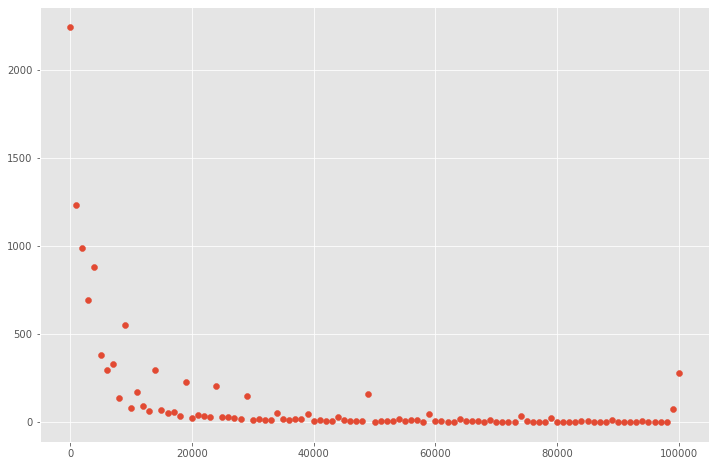

In [198]:
plt.figure(figsize=(12,8))
plt.scatter(goal_pivot.index, goal_pivot[('count', 'state')]) #(ÂàÜ„Åë„ÇãË¶ÅÁ¥†, È´ò„Åï)
plt.show()

C:\Users\ishizuka\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


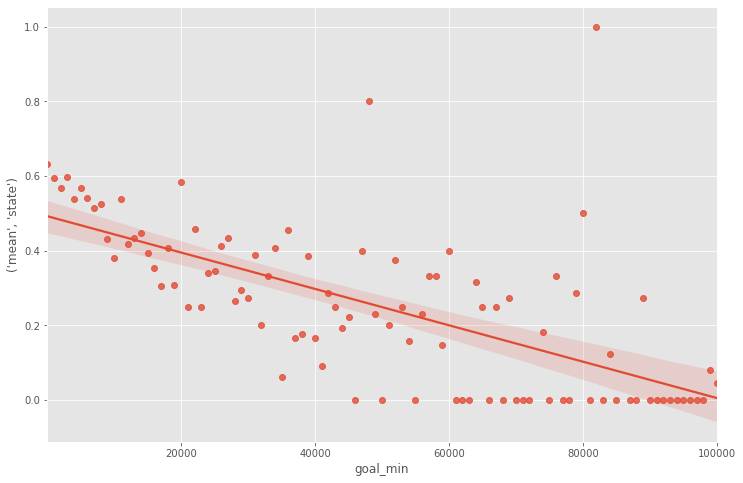

In [199]:
plt.figure(figsize=(12,8))
sns.regplot(goal_pivot.index, goal_pivot[('mean', 'state')]) #(ÂàÜ„Åë„ÇãË¶ÅÁ¥†, È´ò„Åï)
plt.show()

## country

In [200]:
all_df["country"].value_counts()

US    14919
GB     2277
CA      959
AU      564
DE      322
FR      314
MX      287
IT      248
SE      171
NL      165
ES      161
DK      118
HK      107
NZ       87
IE       78
SG       60
NO       58
BE       54
CH       54
JP       40
AT       39
LU        7
Name: country, dtype: int64

In [201]:
country_pivot = all_df.pivot_table(index="country", values="state", aggfunc=["mean","count"])
country_pivot

mean count
            state state
country                
AT       0.357143    14
AU       0.399329   298
BE       0.250000    28
CA       0.486922   497
CH       0.419355    31
DE       0.436047   172
DK       0.588235    68
ES       0.302326    86
FR       0.530120   166
GB       0.564912  1140
HK       0.789474    57
IE       0.512821    39
IT       0.276423   123
JP       0.708333    24
LU       0.333333     3
MX       0.496774   155
NL       0.360465    86
NO       0.357143    28
NZ       0.459459    37
SE       0.395062    81
SG       0.312500    32
US       0.510163  7380

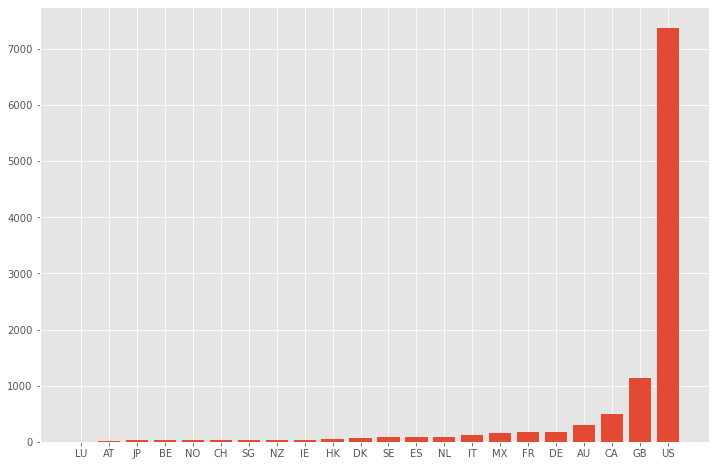

In [202]:
# count
fig, axes = plt.subplots(1, 1, figsize=(12, 8))
plt.bar(country_pivot.sort_values(('count', 'state')).index, country_pivot.sort_values(('count', 'state'))[('count', 'state')])  
plt.show()

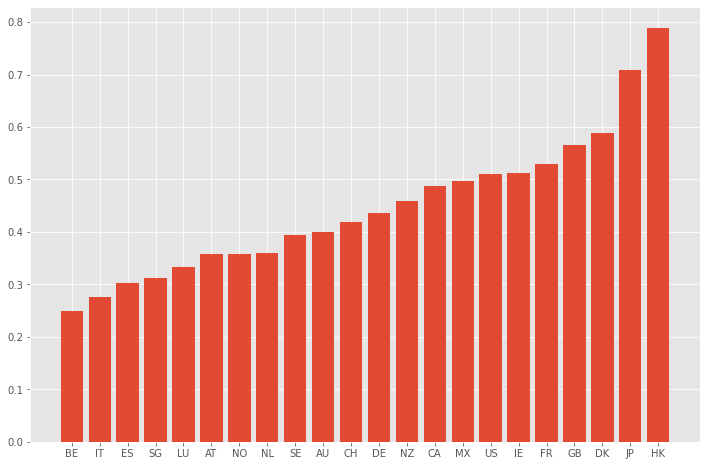

In [203]:
# state mean
plt.figure(figsize=(12, 8))
plt.bar(country_pivot.sort_values(('mean', 'state')).index, country_pivot.sort_values(('mean', 'state'))[('mean', 'state')])  
plt.show()

## duration

In [204]:
duration_pivot = all_df.pivot_table(index="duration", values="state", aggfunc=["count","mean"])
duration_pivot

count      mean
         state     state
duration                
1            5  0.000000
2           10  0.500000
3            6  0.500000
4            9  0.111111
5           20  0.600000
6           22  0.590909
7           73  0.630137
8           17  0.647059
9           34  0.823529
10          78  0.589744
11          30  0.800000
12          26  0.692308
13          38  0.631579
14         169  0.644970
15         190  0.615789
16          38  0.763158
17          48  0.687500
18          47  0.723404
19          55  0.527273
20         271  0.601476
21         203  0.689655
22         106  0.641509
23          66  0.696970
24          85  0.600000
25         177  0.576271
26          73  0.698630
27         102  0.686275
28         165  0.678788
29         636  0.479560
30        4560  0.471491
31         260  0.700000
32         139  0.625899
33         124  0.620968
34          95  0.505263
35         220  0.572727
36          50  0.700000
37          60  0.683333
38          40  0.700000
39          53  0.566038
40         209  0.507177
41          35  0.657143
42          43  0.697674
43          24  0.500000
44         102  0.480392
45         366  0.423497
46          29  0.689655
47          13  0.615385
48          20  0.450000
49          26  0.423077
50          66  0.469697
51          24  0.333333
52          24  0.500000
53          20  0.400000
54          19  0.421053
55          24  0.375000
56          17  0.411765
57          24  0.250000
58          34  0.411765
59         269  0.308550
60         731  0.269494
61           1  1.000000
62           0       NaN
63           0       NaN
70           2  1.000000
71           1  1.000000
72           1  1.000000
74           3  1.000000
76           1  1.000000
80           2  1.000000
81           1  1.000000
84           1  0.000000
85           1  0.000000
86           1  1.000000
88           0       NaN
89           7  0.428571
90           4  0.500000

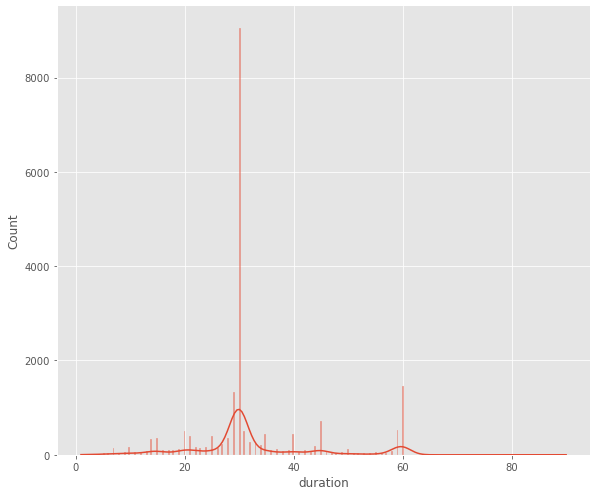

In [205]:
sns.displot(all_df['duration'], kde=True,  height=7, aspect=1.2)

C:\Users\ishizuka\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


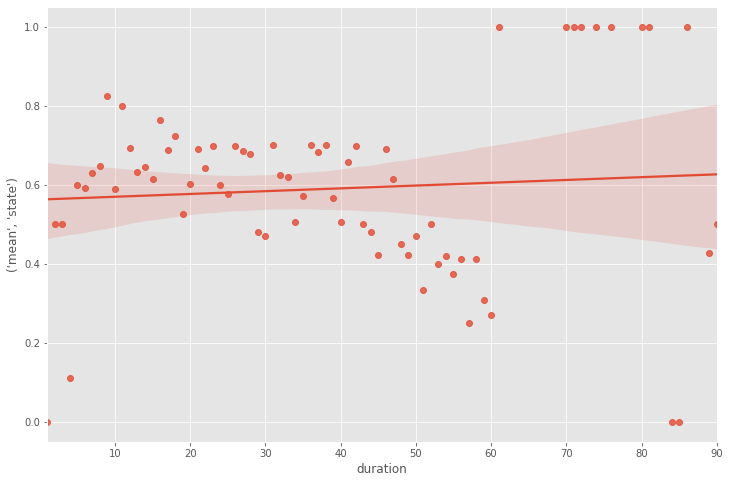

In [206]:
# Ê®™Âêë„Åç„ÅØbarh
plt.figure(figsize=(12, 8))
sns.regplot(duration_pivot.index, duration_pivot[("mean","state")]) #(ÂàÜ„Åë„ÇãË¶ÅÁ¥†, È´ò„Åï)
plt.show()

## category1

In [207]:
cate1_pivot = all_df.pivot_table(index="category1", values="state", aggfunc=["mean","count"]) 
cate1_pivot

mean count
                 state state
category1                   
art           0.506938  1081
comics        0.770751   253
crafts        0.352679   448
dance         0.709677   186
design        0.498270   289
fashion       0.520388   515
film & video  0.546835  1580
food          0.288515  1071
games         0.486869   495
journalism    0.221122   303
music         0.629962  1562
photography   0.427699   491
publishing    0.631263   998
technology    0.335280   856
theater       0.673861   417

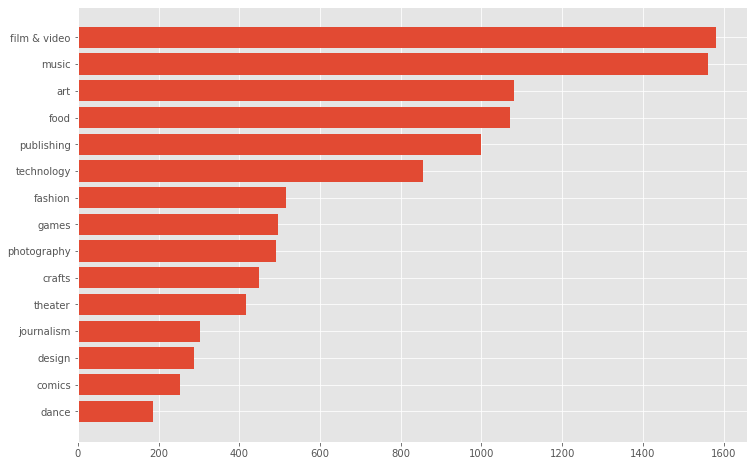

In [208]:
plt.figure(figsize=(12,8))
plt.barh(cate1_pivot.sort_values(('count', 'state')).index, cate1_pivot.sort_values(('count', 'state'))[('count', 'state')]) #(ÂàÜ„Åë„ÇãË¶ÅÁ¥†, È´ò„Åï)
plt.show()

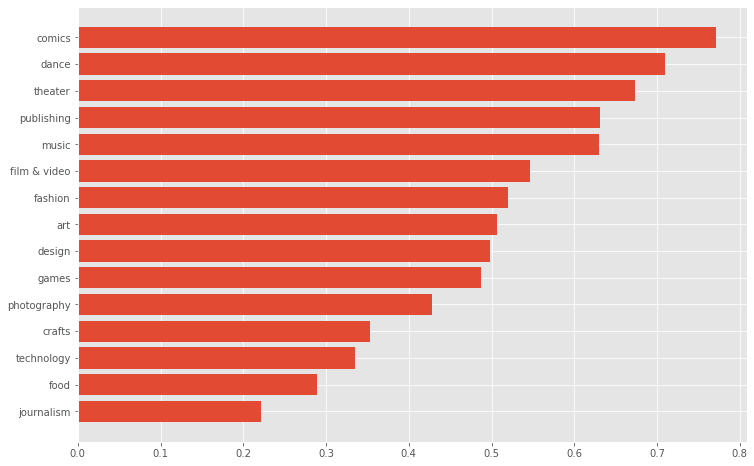

In [209]:
plt.figure(figsize=(12,8))
plt.barh(cate1_pivot.sort_values(('mean', 'state')).index, cate1_pivot.sort_values(('mean', 'state'))[('mean', 'state')]) #(ÂàÜ„Åë„ÇãË¶ÅÁ¥†, È´ò„Åï)
plt.show()

## category2

In [210]:
print(len(all_df["category2"].unique()))

145


In [211]:
cate2_pivot = all_df.pivot_table(index=("category2"), values="state", aggfunc=["mean","count"]) 
cate2_pivot

mean count
                       state state
3d printing         0.239130    46
academic            0.126761    71
accessories         1.000000    80
action              0.144928    69
animals             0.250000    20
animation           0.267717   127
anthologies         0.629630    54
apparel             0.933884   121
apps                0.311688    77
architecture        0.224490    49
art books           0.706897   116
audio               0.243243    37
bacon               0.434783    23
blues               0.363636    22
calendars           0.142857    21
camera equipment    0.363636    33
candles             0.131579    38
ceramics            0.342857    35
children's books    1.000000   117
childrenswear       0.288889    45
chiptune            1.000000     4
civic design        0.392857    28
classical music     0.770186   161
comedy              0.471503   193
comic books         1.000000    88
community gardens   0.230769    26
conceptual art      0.508197    61
cookbooks           0.250000    52
country & folk      1.000000   148
couture             0.066667    15
crochet             0.368421    19
digital art         0.258065    93
diy                 0.264706   136
diy electronics     0.488889    45
documentary         1.000000   135
drama               0.465116   172
drinks              0.345238   168
electronic music    0.375000   144
embroidery          0.166667    12
events              0.216867    83
experimental        0.417722    79
fabrication tools   0.304348    23
faith               0.440476    84
family              0.130435    23
fantasy             0.379310    29
farmer's markets    0.179487    39
farms               0.281250    96
festivals           0.675325    77
fiction             1.000000   108
fine art            0.500000    80
flight              0.181818    22
food trucks         0.154839   155
footwear            0.354430    79
gadgets             0.691489    94
gaming hardware     0.375000    24
glass               0.384615    13
graphic design      0.385321   109
graphic novels      0.697674    86
hardware            0.536585    82
hip-hop             0.211538   156
horror              0.347826    92
illustration        1.000000    71
immersive           0.607143    28
indie rock          1.000000   137
installations       0.450000    40
interactive design  0.192308    26
jazz                0.657143   140
jewelry             0.231579    95
kids                0.450000    20
knitting            0.714286    14
latin               0.133333    15
letterpress         0.500000     2
literary journals   0.454545    22
literary spaces     0.666667     3
live games          0.211765    85
makerspaces         0.071429    14
metal               0.489796    49
mixed media         0.458333   144
mobile games        0.119760   167
movie theaters      0.166667    30
music videos        0.452381    42
musical             0.688889    90
narrative film      0.895161   124
nature              0.222222    45
nonfiction          1.000000   154
painting            0.541935   155
people              0.401709   117
performance art     0.533742   163
performances        0.746377   138
periodicals         0.348315    89
pet fashion         0.142857     7
photo               0.176471    17
photobooks          0.556250   160
places              0.275362    69
playing cards       0.854369   103
plays               0.683908   174
poetry              0.413462   104
pop                 0.661871   139
pottery             0.666667    18
print               0.310811    74
printing            0.411765    17
product design      1.000000    73
public art          0.660714   168
punk                0.414634    41
puzzles             0.333333    15
quilts              0.333333     6
r&b                 0.179487    39
radio & podcasts    0.346154    52
ready-to-wear       0.136986    73
residencies         0.800000    10
restaurants         0.312169   189
robots              0.548387    31
rock                1.000000   138

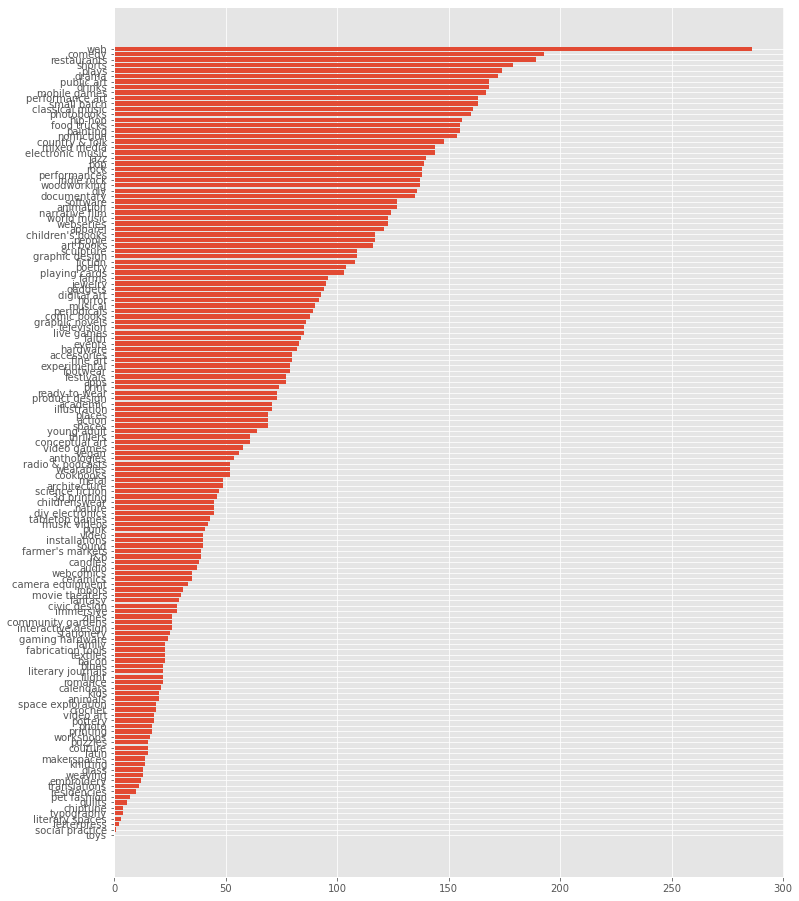

In [212]:
plt.figure(figsize=(12,16))
plt.barh(cate2_pivot.sort_values(('count', 'state')).index,
         cate2_pivot.sort_values(('count', 'state'))[('count', 'state')]) 
plt.show()

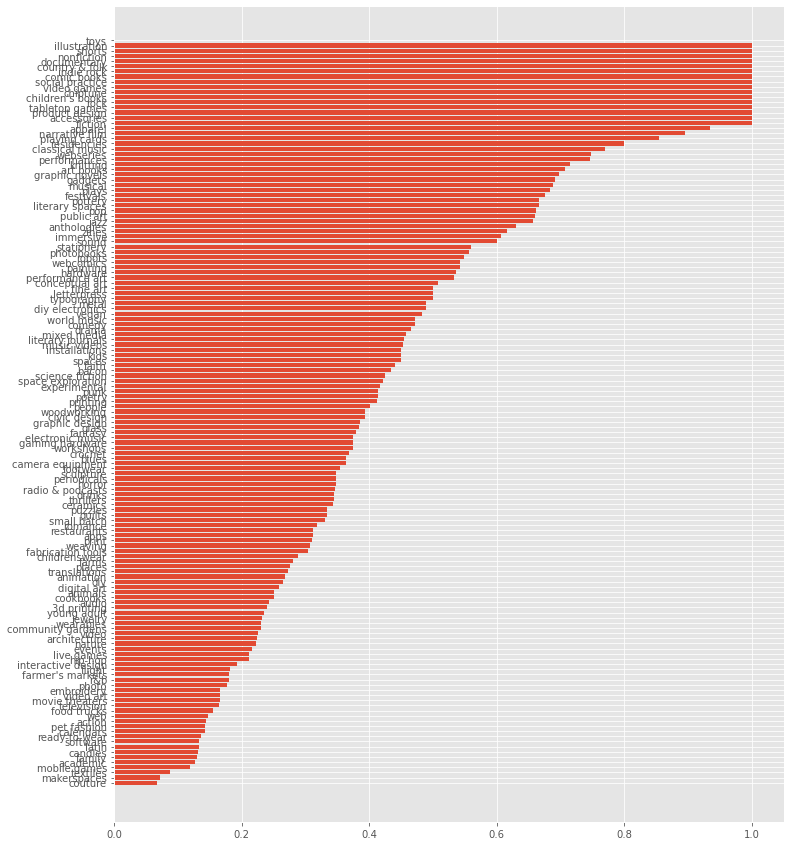

In [213]:
plt.figure(figsize=(12,15))
plt.barh(cate2_pivot.sort_values(('mean', 'state')).index,
         cate2_pivot.sort_values(('mean', 'state'))[("mean", "state")])
plt.show()

In [214]:
## category1 + category2

In [215]:
cate_pivot = all_df.pivot_table(index=("category1", "category2"), values="state", aggfunc=["mean","count"]) 
cate_pivot

mean count
                                    state state
category1    category2                         
art          ceramics            0.342857    35
             conceptual art      0.508197    61
             digital art         0.258065    93
             illustration        1.000000    71
             installations       0.450000    40
             mixed media         0.458333   144
             painting            0.541935   155
             performance art     0.533742   163
             public art          0.660714   168
             sculpture           0.348624   109
             social practice     1.000000     1
             textiles            0.086957    23
             video art           0.166667    18
comics       anthologies         0.781250    32
             comic books         1.000000    88
             events              0.250000    12
             graphic novels      0.697674    86
             webcomics           0.542857    35
crafts       candles             0.131579    38
             crochet             0.368421    19
             diy                 0.264706   136
             embroidery          0.166667    12
             glass               0.384615    13
             knitting            0.714286    14
             pottery             0.666667    18
             printing            0.411765    17
             quilts              0.333333     6
             stationery          0.560000    25
             weaving             0.307692    13
             woodworking         0.394161   137
dance        performances        0.746377   138
             residencies         0.800000    10
             spaces              0.681818    22
             workshops           0.375000    16
design       architecture        0.224490    49
             civic design        0.392857    28
             graphic design      0.385321   109
             interactive design  0.192308    26
             product design      1.000000    73
             toys                     NaN     0
             typography          0.500000     4
fashion      accessories         1.000000    80
             apparel             0.933884   121
             childrenswear       0.288889    45
             couture             0.066667    15
             footwear            0.354430    79
             jewelry             0.231579    95
             pet fashion         0.142857     7
             ready-to-wear       0.136986    73
film & video action              0.144928    69
             animation           0.267717   127
             comedy              0.435897   156
             documentary         1.000000   135
             drama               0.465116   172
             experimental        0.340909    44
             family              0.130435    23
             fantasy             0.379310    29
             festivals           0.400000    20
             horror              0.347826    92
             movie theaters      0.166667    30
             music videos        0.452381    42
             narrative film      0.895161   124
             romance             0.318182    22
             science fiction     0.425532    47
             shorts              1.000000   179
             television          0.164706    85
             thrillers           0.344262    61
             webseries           0.747967   123
food         bacon               0.434783    23
             community gardens   0.230769    26
             cookbooks           0.250000    52
             drinks              0.345238   168
             events              0.211268    71
             farmer's markets    0.179487    39
             farms               0.281250    96
             food trucks         0.154839   155
             restaurants         0.312169   189
             small batch         0.331288   163
             spaces              0.272727    33
             vegan               0.482143    56
games        gaming hardware     0.375000    24
     

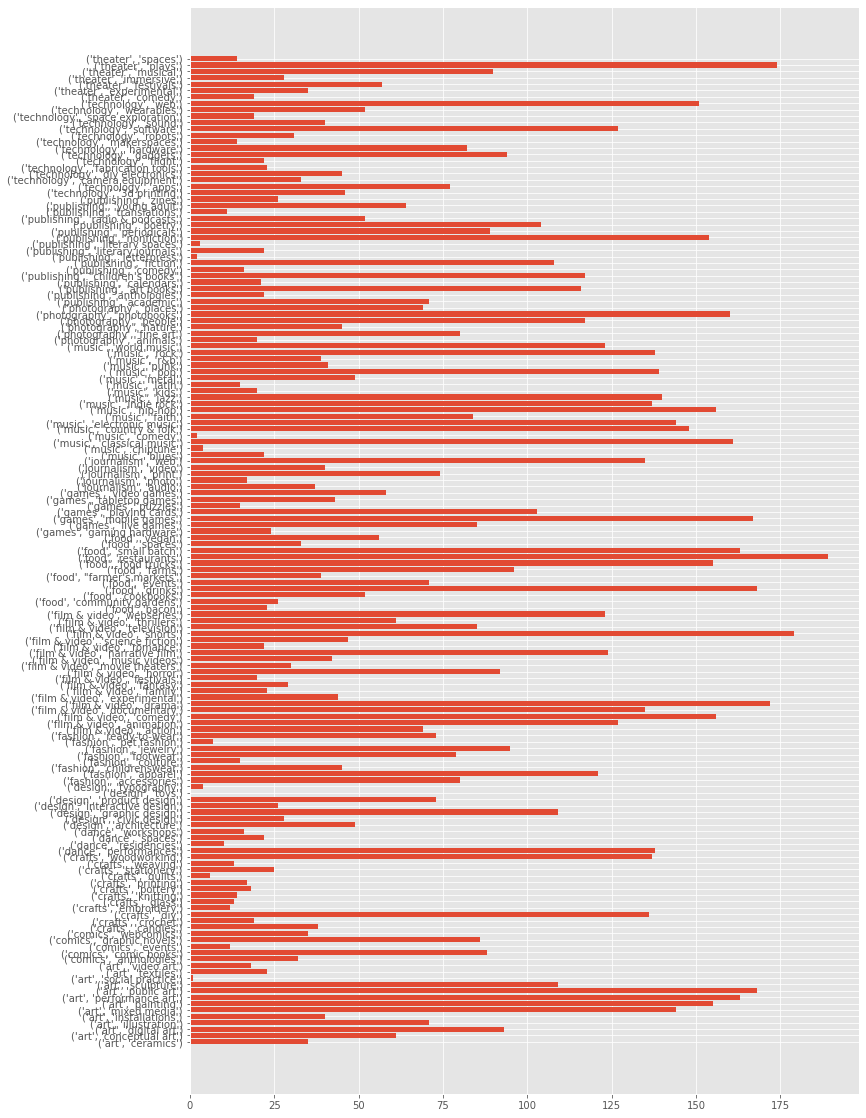

In [216]:
plt.figure(figsize=(12,20))
plt.barh([str(cate) for cate in cate_pivot.index],
         cate_pivot[('count', 'state')])
plt.show()

## html_content

In [217]:
print(all_df["html_content"].iloc[0])

<div class="contents"><div><span class="bold">Mark Saggia</span> is an Italian writer who emigrated in Switzerland.<p>He is a Nerd, Star Wars, Marvel Comics and videogames Fanatic! IT's part of his entire life.</p><p>The story born when Mark, thinking about The Big Bang Theory, understood that what's missing in the world is a nerd story for who loves videogames and all "things" like this. A story wrote in typical nerd language.</p><p>The book has been published in Italian. It can be found at amazon.it or via Facebook. You can find some info at <a href="http://dummy.com" to a large one, who wouldn't have respect for his ideas.¬†</p><p>They can do many things, sometimes only for money, that's not our idea of success.¬†</p><p>This means that our small, unique, caring publisher, can‚Äôt reach the USA. No matter how hard they tries.</p><p>Money for printing, find someone for distribution, marketing and other things are needed.¬†</p><p>So we ventured to USA. We searched and searched‚Ä¶.and f

In [218]:
for i in range(all_df["html_content"][all_df["country"]=="JP"].shape[0]):
    print(all_df["html_content"][all_df["country"]=="JP"].iloc[i])
    print()

<div class="contents"><div><div class="template asset" contenteditable="false" data-alt-text="Photo by KURO" data-caption="Photo by KURO" data-id="_xxx_">
<figure>
<img alt="Photo by KURO" class="fit lazyload" data-src="http://dummy.com"/>
<figcaption class="px2">Photo by KURO</figcaption>
</figure>
</div>
<br/>
<p>Êó•Êú¨Âèä„Å≥„Ç¢„Ç∏„Ç¢„ÅÆ‰∫∫Ê∞ó„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„ÇíÔºíÔºêÂêç‰ª•‰∏äÈõÜ„ÇÅ„ÅüÂÜôÁúüÈõÜ„Åß„Åô„ÄÇ „Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„Å´Áµ∂Â§ß„Å™ÊîØÊåÅ„ÇíÂæó„Å¶„ÅÑ„Çã„Ç´„É°„É©„Éû„É≥KURO„Å´„Çà„ÇãÊíÆÂΩ±„ÅÆÂÜôÁúüÈõÜ„Åß„Åô„ÄÇ„Ç¢„Ç∏„Ç¢„ÅÆ‰∫∫Ê∞ó„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„ÅåÊó•Êú¨„ÅÆË¶≥ÂÖâÂêçÊâÄÁ≠â„ÅßÊíÆÂΩ±„Åô„ÇãË≤¥Èáç„Å™‰∏ñÁïåÂàù„ÅÆ„Éá„Ç∏„Çø„É´‰ΩúÂìÅÈõÜ„Åä„Çà„Å≥„Éè„Éº„Éâ„Ç´„Éê„ÉºÂÜôÁúüÈõÜ„ÄÇ‰ªäÂæå„Ç∑„É™„Éº„Ç∫Âåñ„Åó„ÄÅ„É®„Éº„É≠„ÉÉ„Éë„ÅÆ„Ç≥„Çπ„Éó„É¨„Ç§„É§„ÉºÁ∑®„Å™„Å©„ÇÇÂá∫Áâà„Åó„Åæ„Åô„ÄÇ</p>
<p>ÂÜôÁúü„ÅØ„ÄÅÊó•Êú¨ÂêÑÂú∞„ÅÆË¶≥ÂÖâÂêçÊâÄ„Å™„Å©„Å®ÈÄ£Êê∫„Åó„ÄÅ„Ç™„É™„Ç∏„Éä„É´„ÅÆÊì¨‰∫∫Âåñ„Ç≠„É£„É©„ÇØ„Çø„Éº„Çí„Éá„Ç∂„Ç§„É≥„ÄÇÂÆåÂÖ®„Ç™„É™„Ç∏„Éä„É´„ÅÆ„Ç¢„Éã„É°„Ç≠„É£„É©„ÇØ„Çø„Éº„Å®ÂÖ±„Å´„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„Çí‰∏ñÁ

# ÁâπÂæ¥Èáè„Ç®„É≥„Ç∏„Éã„Ç¢„É™„É≥„Ç∞

## È†ÜÂ∫èÁâπÂæ¥Èáè„ÅÆ„Éû„ÉÉ„Éî„É≥„Ç∞

## binning

C:\Users\ishizuka\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


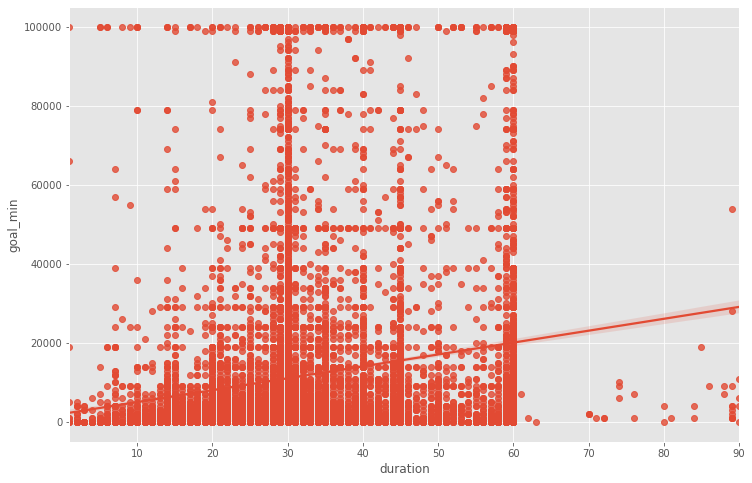

In [220]:
plt.figure(figsize=(12, 8))
sns.regplot(all_df["duration"], all_df["goal_min"])
plt.show()

In [221]:
# goal
bin_edges = [-1, 19999, 39999, 79999, np.inf]
all_df["bins_goal"] = pd.cut(all_df["goal_min"], bins=bin_edges, labels=False)

# duration
bin_edges = [-1, 20, 45, 60, 100]
all_df["bins_duration"] = pd.cut(all_df["duration"], bins=bin_edges, labels=False)

In [222]:
# „Éì„É≥„ÅÆÂèØË¶ñÂåñ

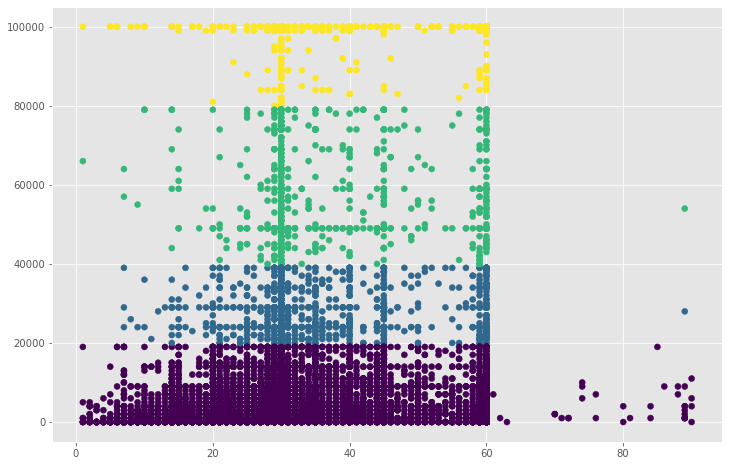

In [223]:
plt.figure(figsize=(12, 8))
plt.scatter(all_df["duration"], all_df["goal_min"], c=all_df["bins_goal"])
plt.show()

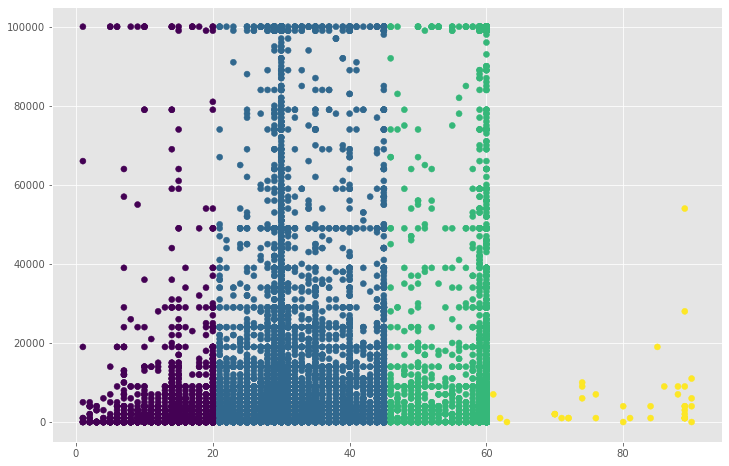

In [224]:
plt.figure(figsize=(12, 8))
plt.scatter(all_df["duration"], all_df["goal_min"], c=all_df["bins_duration"])
plt.show()

## Â§âÊï∞„ÅÆÁµÑ„ÅøÂêà„Çè„Åõ

In [225]:
all_df.dtypes

id                   int64
goal                object
country             object
duration             int64
category1           object
category2           object
html_content        object
state              float64
goal_upper_flag       bool
goal_lower_flag       bool
goal_min             int32
bins_goal            int64
bins_duration        int64
dtype: object

### „Ç´„ÉÜ„Ç¥„É™Â§âÊï∞√ó„Ç´„ÉÜ„Ç¥„É™Â§âÊï∞

In [226]:
# cagtegory1+category2
all_df["category"] = all_df["category1"] + "_" + all_df["category2"]

# country+category
all_df["country+category1"] = all_df["country"] + all_df["category1"]
all_df["country+category2"] = all_df["country"] + all_df["category2"]
all_df["country+category"] = all_df["country"] + all_df["category"]

# bin+bin
all_df["bins_goalduration"] = all_df["bins_duration"] + all_df["bins_goal"]

### Êï∞ÂÄ§Â§âÊï∞√óÊï∞ÂÄ§Â§âÊï∞

In [227]:
# goal / duration
all_df["goalMin/duration"] = all_df["goal_min"] / (all_df["duration"] + 1)

# goal * duration
all_df["goalMin*duration"] = all_df["goal_min"] * (all_df["duration"])

C:\Users\ishizuka\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(-0.1, 1.1)

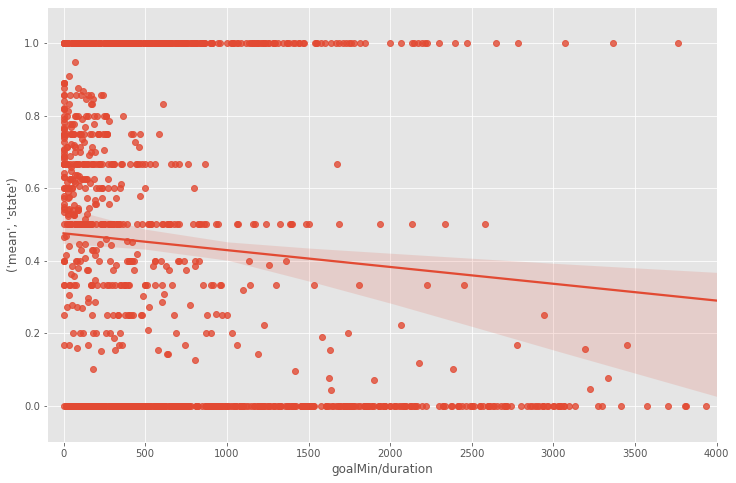

In [228]:
# ÂèØË¶ñÂåñ
gd_pivot = all_df.pivot_table(index=("goalMin/duration"), values="state", aggfunc=["mean"]) 

plt.figure(figsize=(12, 8))
sns.regplot(gd_pivot.index, gd_pivot[("mean", "state")])
plt.xlim(-100, 4000)
plt.ylim(-0.1, 1.1)

In [45]:
# clipping

### „Ç´„ÉÜ„Ç¥„É™Â§âÊï∞√óÊï∞ÂÄ§Â§âÊï∞

#### ÈõÜÁ¥ÑÁâπÂæ¥Èáè

In [229]:
cate_cols = [
    "category1",
    "category2",
    "category",
    "country",
#     "country+category1",
#     "country+category2",
#     "country+category",
#     "bins_duration",
#     "bins_goal",
    "bins_goalduration",
]

group_values = [
    "goal_min",
    "duration",
    "goalMin/duration",
    "goalMin*duration"
]

for col in cate_cols:
    for group in group_values:
        all_df["mean_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).mean()[group]) # Âπ≥Âùá
        all_df["std_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).std()[group])   # ÂàÜÊï£
        all_df["max_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).max()[group])   # ÊúÄÂ§ßÂÄ§
        all_df["min_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).min()[group])   # ÊúÄÂ∞èÂÄ§
        all_df["nunique_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).nunique()[group])   # uniaue
        all_df["median_{}_{}".format(col, group)] = all_df[col].map(all_df.groupby(col).median()[group])   # ‰∏≠Â§ÆÂÄ§


#### Áõ∏ÂØæÂÄ§

In [230]:
cate_cols = [
#     "category1",
#     "category2",
    "category",
    "country",
#     "country+category1",
#     "country+category2",
#     "country+category",
#     "bins_duration",
#     "bins_goal",
#     "bins_goalduration",
]

group_values = [
    "goal_min",
    "duration",
    "goalMin/duration",
    "goalMin*duration"
]

# „Ç´„ÉÜ„Ç¥„É™„Åî„Å®„ÅÆÂπ≥Âùá„Å®„ÅÆÂ∑Æ
for col in cate_cols:
    for group in group_values:
        all_df["{}_diff_{}".format(col, group)] = all_df[group] - all_df["mean_{}_{}".format(col, group)]

## Frecency Encoding

In [231]:
cat_cols = [
        "category1",
        "category2",
        "category",
        "country",
        "country+category1",
        "country+category2",
        "country+category",
        "bins_duration",
        "bins_goal",
        "bins_goalduration",
    ]

for col in cat_cols:
    freq = all_df[col].value_counts()
    # „Ç´„ÉÜ„Ç¥„É™„ÅÆÂá∫ÁèæÂõûÊï∞„ÅßÁΩÆÊèõ
    all_df["freq_{}".format(col)] = all_df[col].map(freq)

In [232]:
all_df.shape

(21089, 158)

## NLP

### ÂâçÂá¶ÁêÜ

In [50]:
import texthero as hero
from texthero import preprocessing

In [51]:
custom_pipeline_only_tags = [
    preprocessing.fillna,
    preprocessing.remove_html_tags,
    preprocessing.lowercase,
    preprocessing.remove_digits,
    preprocessing.remove_stopwords,
    preprocessing.remove_whitespace,
    preprocessing.stem
]

custom_pipeline_all = [
    preprocessing.fillna,
    preprocessing.remove_html_tags,
    preprocessing.lowercase,
    preprocessing.remove_digits,
    preprocessing.remove_punctuation,
    preprocessing.remove_diacritics,
    preprocessing.lowercase,
    preprocessing.remove_stopwords,
    preprocessing.remove_whitespace,
    preprocessing.stem
]

In [52]:
text_df = pd.DataFrame()
text_df["html_content"] = all_df["html_content"]
text_df["clean_html_content_only_tags"] = hero.clean(all_df["html_content"], custom_pipeline_only_tags)
text_df["clean_html_content"] = hero.clean(all_df["html_content"], custom_pipeline_all)

In [165]:
print(text_df["html_content"][757])

<div class="contents"><div><div class="template asset" contenteditable="false" data-alt-text="Photo by KURO" data-caption="Photo by KURO" data-id="_xxx_">
<figure>
<img alt="Photo by KURO" class="fit lazyload" data-src="http://dummy.com"/>
<figcaption class="px2">Photo by KURO</figcaption>
</figure>
</div>
<br/>
<p>Êó•Êú¨Âèä„Å≥„Ç¢„Ç∏„Ç¢„ÅÆ‰∫∫Ê∞ó„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„ÇíÔºíÔºêÂêç‰ª•‰∏äÈõÜ„ÇÅ„ÅüÂÜôÁúüÈõÜ„Åß„Åô„ÄÇ „Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„Å´Áµ∂Â§ß„Å™ÊîØÊåÅ„ÇíÂæó„Å¶„ÅÑ„Çã„Ç´„É°„É©„Éû„É≥KURO„Å´„Çà„ÇãÊíÆÂΩ±„ÅÆÂÜôÁúüÈõÜ„Åß„Åô„ÄÇ„Ç¢„Ç∏„Ç¢„ÅÆ‰∫∫Ê∞ó„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„ÅåÊó•Êú¨„ÅÆË¶≥ÂÖâÂêçÊâÄÁ≠â„ÅßÊíÆÂΩ±„Åô„ÇãË≤¥Èáç„Å™‰∏ñÁïåÂàù„ÅÆ„Éá„Ç∏„Çø„É´‰ΩúÂìÅÈõÜ„Åä„Çà„Å≥„Éè„Éº„Éâ„Ç´„Éê„ÉºÂÜôÁúüÈõÜ„ÄÇ‰ªäÂæå„Ç∑„É™„Éº„Ç∫Âåñ„Åó„ÄÅ„É®„Éº„É≠„ÉÉ„Éë„ÅÆ„Ç≥„Çπ„Éó„É¨„Ç§„É§„ÉºÁ∑®„Å™„Å©„ÇÇÂá∫Áâà„Åó„Åæ„Åô„ÄÇ</p>
<p>ÂÜôÁúü„ÅØ„ÄÅÊó•Êú¨ÂêÑÂú∞„ÅÆË¶≥ÂÖâÂêçÊâÄ„Å™„Å©„Å®ÈÄ£Êê∫„Åó„ÄÅ„Ç™„É™„Ç∏„Éä„É´„ÅÆÊì¨‰∫∫Âåñ„Ç≠„É£„É©„ÇØ„Çø„Éº„Çí„Éá„Ç∂„Ç§„É≥„ÄÇÂÆåÂÖ®„Ç™„É™„Ç∏„Éä„É´„ÅÆ„Ç¢„Éã„É°„Ç≠„É£„É©„ÇØ„Çø„Éº„Å®ÂÖ±„Å´„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„Çí‰∏ñÁ

In [166]:
text_df["clean_html_content_only_tags"][757]

photo kuro Êó•Êú¨Âèä„Å≥„Ç¢„Ç∏„Ç¢„ÅÆ‰∫∫Ê∞ó„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„ÇíÔºíÔºêÂêç‰ª•‰∏äÈõÜ„ÇÅ„ÅüÂÜôÁúüÈõÜ„Åß„Åô „Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„Å´Áµ∂Â§ß„Å™ÊîØÊåÅ„ÇíÂæó„Å¶„ÅÑ„Çã„Ç´„É°„É©„Éû„É≥kuro„Å´„Çà„ÇãÊíÆÂΩ±„ÅÆÂÜôÁúüÈõÜ„Åß„Åô„Ç¢„Ç∏„Ç¢„ÅÆ‰∫∫Ê∞ó„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„ÅåÊó•Êú¨„ÅÆË¶≥ÂÖâÂêçÊâÄÁ≠â„ÅßÊíÆÂΩ±„Åô„ÇãË≤¥Èáç„Å™‰∏ñÁïåÂàù„ÅÆ„Éá„Ç∏„Çø„É´‰ΩúÂìÅÈõÜ„Åä„Çà„Å≥„Éè„Éº„Éâ„Ç´„Éê„ÉºÂÜôÁúüÈõÜ‰ªäÂæå„Ç∑„É™„Éº„Ç∫Âåñ„Åó„É®„Éº„É≠„ÉÉ„Éë„ÅÆ„Ç≥„Çπ„Éó„É¨„Ç§„É§„ÉºÁ∑®„Å™„Å©„ÇÇÂá∫Áâà„Åó„Åæ„Åô ÂÜôÁúü„ÅØÊó•Êú¨ÂêÑÂú∞„ÅÆË¶≥ÂÖâÂêçÊâÄ„Å™„Å©„Å®ÈÄ£Êê∫„Åó„Ç™„É™„Ç∏„Éä„É´„ÅÆÊì¨‰∫∫Âåñ„Ç≠„É£„É©„ÇØ„Çø„Éº„Çí„Éá„Ç∂„Ç§„É≥ÂÆåÂÖ®„Ç™„É™„Ç∏„Éä„É´„ÅÆ„Ç¢„Éã„É°„Ç≠„É£„É©„ÇØ„Çø„Éº„Å®ÂÖ±„Å´„Ç≥„Çπ„Éó„É¨„Ç§„É§„Éº„Çí‰∏ñÁïå„Å´Áô∫‰ø°Ëá¥„Åó„Åæ„Åô ÂÖ¨Âºè„Çµ„Ç§„Éà„ÅØ„Åì„Å°„Çâ ÂÖ¨Âºè„Çµ„Ç§„Éà / offici site collect photo bring togeth popular cosplay japan asia. photo collect taken kuro, photograph huge follow among cosplayers. world first digit collect hardcov version photo book, valuabl work featur popular asian cosplay famous tourist attract elsewher japan

In [54]:
text_df["clean_html_content"][757]

'photo kuro ri ben ji biazianoren qi kosupureiyawo20m yi shang ji metaxi zhen ji desu. kosupureiyaniju da nazhi chi wode teirukameramankuroniyorucuo ying noxi zhen ji desu. azianoren qi kosupureiyagari ben noguan guang ming suo deng decuo ying surugui zhong nashi jie chu nodezitaruzuo pin ji oyobihadokabaxi zhen ji . jin hou shirizuhua shi, yorotsupanokosupureiyabian nadomochu ban shimasu. xie zhen ha, ri ben ge di noguan guang ming suo nadotolian xi shi, orizinarunoni ren hua kiyarakutawodezain. wan quan orizinarunoanimekiyarakutatogong nikosupureiyawoshi jie nifa xin zhi shimasu. gong shi saitohakochira gong shi saito offici site collect photo bring togeth popular cosplay japan asia photo collect taken kuro photograph huge follow among cosplay world first digit collect hardcov version photo book valuabl work featur popular asian cosplay famous tourist attract elsewher japan plan produc seri includ european version among other kuro kuro xie zhen jia kuro nopurohuiru 1983nian sheng mar

### basic features

In [55]:
# basic reatures
def get_basic_features(dataframe, column):
    all_df[column + '_num_chars'] = dataframe[column].apply(len)
    all_df[column + '_num_exclamation_marks'] = dataframe[column].apply(lambda x: x.count('!'))
    all_df[column + '_num_question_marks'] = dataframe[column].apply(lambda x: x.count('?'))
    all_df[column + '_num_punctuation'] = dataframe[column].apply(lambda x: sum(x.count(w) for w in '.,;:'))
    all_df[column + '_num_symbols'] = dataframe[column].apply(lambda x: sum(x.count(w) for w in '*&$%'))
    all_df[column + '_num_words'] = dataframe[column].apply(lambda x: len(x.split()))
    all_df[column + '_num_unique_words'] = dataframe[column].apply(lambda x: len(set(w for w in x.split())))
    all_df[column + '_words_vs_unique'] = all_df[column + '_num_unique_words'] / (all_df[column + '_num_words']+1)
    all_df[column + '_words_vs_chars'] = all_df[column  + '_num_words'] / (all_df[column + '_num_chars']+1)

# html_content„Å´ÂØæ„Åó„Å¶
get_basic_features(text_df, "html_content")
# clean_html_content_only_tags„Å´ÂØæ„Åó„Å¶
get_basic_features(text_df, "clean_html_content_only_tags")

In [56]:
# clean_html_content„Å´ÂØæ„Åó„Å¶
all_df["len_clean_html_content"] = text_df["clean_html_content"].apply(len)
# 0„Åã„Å©„ÅÜ„Åã
all_df["frag_len0"] = all_df["len_clean_html_content"]==0

In [57]:
all_df.shape

(21089, 306)

### „Çø„Ç∞„ÇíÈõÜË®à

In [167]:
import re

In [189]:
# ÂêÑ„Çø„Ç∞„ÅÆÊï∞„ÇíÈõÜË®à
tags = ["<figure", "<video", "bold"]

for tag in tags:
    all_df["tag_num_"+tag] = text_df["html_content"].apply(lambda x: len(re.findall(tag, x)))
    
# Ë∂≥„ÄÅÂâ≤
all_df["tag_num_figurevideo"] = all_df["tag_num_<figure"] + all_df["tag_num_<video"]
all_df["tag_num_figurevideo/num_chars"] = all_df["tag_num_figurevideo"] / all_df["html_content_num_chars"]

### tf-idf, UMAP

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import mutual_info_classif

In [59]:
from scipy.sparse.csgraph import connected_components
import os
os.environ['HDF5_DISABLE_VERSION_CHECK']='1'

import umap

In [60]:
%%time
# tf-idf + UMAP
pipe_raw = make_pipeline(TfidfVectorizer(norm="l2", max_df=0.1, min_df=2),
                         umap.UMAP(n_components=30),
                        )
pipe_remove_tags = make_pipeline(TfidfVectorizer(norm="l2", max_df=0.1, min_df=2),
                                 umap.UMAP(n_components=20),
                                )
pipe_only_text = make_pipeline(TfidfVectorizer(norm="l2", max_df=0.1, min_df=2),
                               umap.UMAP(n_components=20),
                              )

raw_um = pipe_raw.fit_transform(text_df["html_content"])
remove_tags_um = pipe_remove_tags.fit_transform(text_df["clean_html_content_only_tags"])
only_text_um = pipe_only_text.fit_transform(text_df["clean_html_content"])

Wall time: 5min 53s


In [61]:
# ÁâπÂæ¥Èáè„Å´ËøΩÂä†
names = ["raw", "remove_tags", "only_text"]
for i, X_um in enumerate([raw_um, remove_tags_um, only_text_um]):
    for n in range(X_um.shape[1]):
        all_df["umap_{}_{}".format(names[i],n)] = X_um[:, n]

In [62]:
all_df.shape

(21089, 562)

In [63]:
# tf-idf„ÅåÈ´ò„ÅÑ„Åæ„Åü„ÅØ‰Ωé„ÅÑÁâπÂæ¥Èáè„ÇíË°®Á§∫„Åô„Çã
# „Éë„Ç§„Éó„É©„Ç§„É≥„Åã„ÇâÂèñ„ÇäÂá∫„Åô
tf = pipe_only_text.named_steps["tfidfvectorizer"]
X_tfid = tf.transform(text_df["clean_html_content"])
# tf-idf„ÇíÂèñÂæó
max_value = X_tfid.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# feature names# „ÇíÂèñÂæó
feature_names = np.array(tf.get_feature_names())

print("Features with lowest tfidf:\n{}".format(feature_names[sorted_by_tfidf[:50]]))
print("Features with highest tfidf: \n{}".format(feature_names[sorted_by_tfidf[-50:]]))

Features with lowest tfidf:
['nomme' 'homologu' 'prolonge' '80gr' 'intervienn' 'testent' 'thermiqu'
 'chaleureus' 'tissag' 'approximatif' 'amov' 'bouclier' 'etir' 'arromba'
 'taillant' 'noue' 'embarqu' 'environnement' 'inferieur' 'adhesif'
 'sommet' '2015nian' 'geografica' 'soldati' 'simili' 'dhanuka' 'smau'
 'gurgaon' 'teachniqu' 'capabilit' 'haryana' 'silicio' 'zouk'
 'postprodukt' 'verhandlungen' 'piratag' 'ouest' 'risultato' 'filier'
 'nahmen' 'rimangono' 'calda' 'entrano' 'discut' 'subi' 'californi'
 'rollerballth' 'keychainthi' 'pensmal' 'briller']
Features with highest tfidf: 
['rodney' 'photographi' 'adc' 'carolin' 'prototyp' 'einband' 'none'
 'doomsday' 'logo' 'bandcamp' 'hear' 'vinyl' 'cash' 'www' 'format' 'total'
 'leagu' 'bend' 'appreci' 'interess' 'sure' 'gratitud' 'exampl' 'poster'
 'bruh' 'p1' 'concept' 'today' 'draw' 'shirt' 'fail' 'generat' 'paul'
 'stick' 'http' 'ship' 'outlin' 'photo' 'paint' 'cancel' 'detail' 'click'
 'worker' 'sunday' 'noth' 'vote' 'facebook' 'prom

In [64]:
# %%time
# # ÁâπÂæ¥ÈáèÈÅ∏Êäû
# selecter = SelectPercentile(percentile=15, score_func=mutual_info_classif)
# selecter.fit(X_tfid[:len(train_df)], train_df["state"])
# X_tfid_select = selecter.transform(X_tfid)

# print(X_tfid.shape)
# print(X_tfid_select.shape)

In [65]:
# ÂçòË™û„Éô„ÇØ„Éà„É´„ÇíÁâπÂæ¥Èáè„Å®„Åó„Å¶ËøΩÂä†
#feature_names = np.array(tf_vect.get_feature_names())
# vect_df = pd.DataFrame(X_tfid_select.toarray()) #, columns=feature_names)
# all_df = pd.concat([all_df, vect_df], axis=1)
# all_df.shape

### LDA

In [66]:
%%time
from sklearn.decomposition import LatentDirichletAllocation

pipe_lda = make_pipeline(CountVectorizer(max_df=0.1,
                                         min_df=2,
                                         #max_features=5000
                                        ),
                         LatentDirichletAllocation(n_components=40,
                                                   random_state=123,
                                                   learning_method="batch",
                                                   max_iter=20)
                        )
x_lda = pipe_lda.fit_transform(text_df["clean_html_content"])

Wall time: 8min 14s


In [67]:
# ÂêÑ„Éà„Éî„ÉÉ„ÇØ„ÇíË°®„ÅôË®ÄËëâ„ÇíË°®Á§∫„Åô„Çã
n_top_words = 10
vect = pipe_lda.named_steps['countvectorizer']
lda = pipe_lda.named_steps['latentdirichletallocation']
feature_names = vect.get_feature_names()

for topic_idx, topic in enumerate(lda.components_):
    print("Topic %d:" % (topic_idx + 1))
    print(" ".join([feature_names[i]
                    for i in topic.argsort()\
                        [:-n_top_words - 1:-1]]))

Topic 1:
game card player height soundcloud charact emb ifram max fun
Topic 2:
coffe restaur truck kitchen shop bar serv drink cafe brew
Topic 3:
comic charact seri anim novel issu fan hero horror adventur
Topic 4:
di il la che un per una del le con
Topic 5:
recip cook flavor sauc chees chicken hot bbq tast pepper
Topic 6:
size shoe fit cloth fabric wear fashion comfort leather shirt
Topic 7:
candl tm og bee er til en pa wax af
Topic 8:
farm water organ plant natur tea fruit healthi farmer sustain
Topic 9:
dog pet anim shelter wave rescu tom surf hat treat
Topic 10:
adam hors orlean queer dinosaur documentari princess jake lgbtq author
Topic 11:
de et la le les en un des pour est
Topic 12:
app user devic technolog connect phone softwar data system comput
Topic 13:
ice robot scienc speci cream fire wildlif anim butterfli mar
Topic 14:
media site facebook onlin fee sell check social expens week
Topic 15:
album song band musician cd master mix track tour guitar
Topic 16:
say got away thou

In [68]:
# ÁâπÂæ¥Èáè„Å´ËøΩÂä†
all_df = pd.concat([all_df,
                    pd.DataFrame(x_lda, columns=["lda_{}".format(i) for i in range(1, x_lda.shape[1]+1)])],
                   axis=1)
all_df["lda"] = x_lda.argmax(axis=1)
all_df["lda"].value_counts()

14    1810
13    1524
15    1467
29    1418
30    1198
19    1151
39    1147
2      950
1      835
11     812
7      789
5      783
0      780
26     759
17     706
27     625
22     589
20     459
21     443
38     398
4      299
10     291
24     265
31     242
34     235
18     164
33     146
25     137
23      89
35      83
12      71
6       68
9       60
3       55
8       53
36      52
28      50
32      47
16      30
37       9
Name: lda, dtype: int64

In [69]:
# „Éà„Éî„ÉÉ„ÇØÊï∞„ÅÆÊ±∫ÂÆö

from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import lightgbm as lgb

def topic_score(n_components=10, model=lgb.LGBMClassifier()):
    # lda
    pipe_lda = make_pipeline(CountVectorizer(max_df=0.1,
                                             min_df=2,
                                             #max_features=5000
                                            ),
                             LatentDirichletAllocation(n_components=n_components,
                                                       random_state=123,
                                                       learning_method="batch",
                                                       max_iter=20
                                                      )
                            )
    X_lda = pipe_lda.fit_transform(text_df["clean_html_content"])
    X_lda = X_lda[:train_df.shape[0]]
    
    # ‰∏ªË¶ÅÁâπÂæ¥Èáè„ÇÇËøΩÂä†
    df = all_df.loc[:train_df.shape[0]-1, ['goal_min', 'country', 'duration',  'category']]
    
    from sklearn.preprocessing import LabelEncoder
    lb = LabelEncoder()
    for col in df.columns[df.dtypes=="object"]:
        df[col] = lb.fit_transform(df[col])
        
    X = np.concatenate([df, X_lda], axis=1)
    y = train_df["state"]
    
    # ‰∫§Â∑ÆÊ§úË®º                              
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=kfold, n_jobs=1, scoring="f1")
    
    return scores

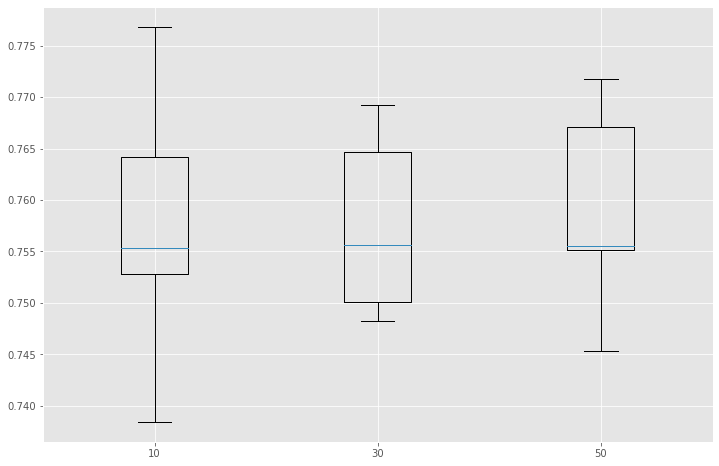

Wall time: 21min 29s


In [70]:
%%time
scores_df = pd.DataFrame()
components = [30, 40, 50]

for i in components:
    scores = topic_score(n_components=i)
    scores_df[i] = scores
    
plt.figure(figsize=(12, 8))
plt.boxplot(scores_df, labels=scores_df.columns) 
plt.show()

## „Çπ„Ç±„Éº„É™„É≥„Ç∞

## „Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞

In [71]:
list(all_df.columns[(all_df.dtypes=="object") | (all_df.dtypes=="bool")])

['goal',
 'country',
 'category1',
 'category2',
 'html_content',
 'goal_upper_flag',
 'goal_lower_flag',
 'category',
 'country+category1',
 'country+category2',
 'country+category',
 'frag_len0']

In [72]:
all_df_enc = all_df.copy()
all_df_enc = all_df_enc.drop(columns=["id", "goal", "html_content"])

### Label Eccoding

In [73]:
# „É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞„Åô„Çã„Ç´„É©„É†
cat_cols = ['goal_upper_flag', 'goal_lower_flag', 'country+category1', 'country+category2', 'country+category','frag_len0']

In [74]:
# Label Eccoding
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
for col in cat_cols:
    all_df_enc[col] = lb.fit_transform(all_df_enc[col])

### Target Encoding

In [75]:
from sklearn.model_selection import KFold

# „Éá„Éº„ÇøÂàÜÂâ≤
train = all_df_enc[all_df_enc["state"].notnull()]
test_x = all_df_enc[all_df_enc["state"].isnull()].drop(columns=["state"])
train_x = train.drop(columns=["state"])
train_y = train["state"]

# Target Encoding„Åô„Çã„Ç´„É©„É†
cat_cols = list(all_df_enc.columns[(all_df_enc.dtypes=="object")])
cat_cols

['country', 'category1', 'category2', 'category']

In [76]:
# Target Encoding

# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥Áî®„Å´Â≠¶Áøí„Éá„Éº„Çø„Å®Ê§úË®º„Éá„Éº„Çø„ÅÆ„Çª„ÉÉ„Éà„ÇíÔºï„Å§‰Ωú„Çã
# „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅÆfold„Åî„Å®„Å´target encoding„Çí„ÇÑ„ÇäÁõ¥„Åô
tr_x_dict = {}
va_x_dict = {}
tr_y_dict = {}
va_y_dict = {}

kf = KFold(n_splits=5, shuffle=True, random_state=124)
for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):

    # Â≠¶Áøí„Éá„Éº„Çø„Å®„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Éá„Éº„Çø„Å´ÂàÜÂâ≤
    tr_x, va_x = train_x.iloc[tr_idx].copy(), train_x.iloc[va_idx].copy()
    tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]

    for c in cat_cols:
        # „Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Éá„Éº„Çø„ÇíÂ§âÊèõ
        data_tmp = pd.DataFrame({c: tr_x[c], 'target': tr_y})
        target_mean = data_tmp.groupby(c)['target'].mean()
        va_x.loc[:, c] = va_x[c].map(target_mean)
        va_x = va_x.fillna(data_tmp["target"].mean()) # nan„Å´„Å™„Å£„Å¶„Åó„Åæ„Å£„Åü„Å®„Åì„Çç„ÅØÂπ≥ÂùáÂÄ§„ÅßÂüã„ÇÅ„Çã

        # Â≠¶Áøí„Éá„Éº„Çø„ÇíÂ§âÊèõ
        tmp = np.repeat(np.nan, tr_x.shape[0])
        kf_encoding = KFold(n_splits=5, shuffle=True, random_state=23)
        for idx_1, idx_2 in kf_encoding.split(tr_x):
            target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
            tmp[idx_2] = tr_x[c].iloc[idx_2].map(target_mean)
        tr_x.loc[:, c] = tmp
        tr_x = tr_x.fillna(data_tmp["target"].mean()) # nan„Å´„Å™„Å£„Å¶„Åó„Åæ„Å£„Åü„Å®„Åì„Çç„ÅØÂπ≥ÂùáÂÄ§„ÅßÂüã„ÇÅ„Çã

    # Â≠¶Áøí„Éá„Éº„Çø„Å®Ê§úË®º„Éá„Éº„Çø„Çí‰øùÂ≠ò
    tr_x_dict["fold_{}".format(i)] = tr_x
    va_x_dict["fold_{}".format(i)] = va_x
    tr_y_dict["fold_{}".format(i)] = tr_y
    va_y_dict["fold_{}".format(i)] = va_y

In [77]:
# „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å®Â≠¶Áøí„Éá„Éº„ÇøÂÖ®‰Ωì„ÇíÂ§âÊèõ„Åô„Çã
for c in cat_cols:
    # „ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÇíÂ§âÊèõ
    data_tmp = pd.DataFrame({c: train_x[c], 'target': train_y})
    target_mean = data_tmp.groupby(c)['target'].mean()
    test_x[c] = test_x[c].map(target_mean)
    test_x = test_x.fillna(data_tmp["target"].mean()) # nan„Å´„Å™„Å£„Å¶„Åó„Åæ„Å£„Åü„Å®„Åì„Çç„ÅØÂπ≥ÂùáÂÄ§„ÅßÂüã„ÇÅ„Çã

    # Â≠¶Áøí„Éá„Éº„ÇøÂÖ®‰Ωì„ÇíÂ§âÊèõ
    tmp = np.repeat(np.nan, train_x.shape[0])
    kf = KFold(n_splits=5, shuffle=True, random_state=72)
    for idx_1, idx_2 in kf.split(train_x):
        target_mean = data_tmp.iloc[idx_1].groupby(c)['target'].mean()
        tmp[idx_2] = train_x[c].iloc[idx_2].map(target_mean)
    train_x[c] = tmp
    train_x = train_x.fillna(data_tmp["target"].mean()) # nan„Å´„Å™„Å£„Å¶„Åó„Åæ„Å£„Åü„Å®„Åì„Çç„ÅØÂπ≥ÂùáÂÄ§„ÅßÂüã„ÇÅ„Çã


print(train_x.shape)
print(test_x.shape)

(10545, 599)
(10544, 599)


# „É¢„Éá„É´ÊßãÁØâ

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

## „Éá„Éº„ÇøÂàÜÂâ≤

In [79]:
# # Label encoding or One-Hot encoding „ÅÆÂ†¥Âêà
# all_df_last = all_df_label

# # ‰∏çË¶Å„Å™ÁâπÂæ¥Èáè„ÅÆÂâäÈô§
# all_df_last = all_df_last.drop(columns=["id", "goal", "html_content"])

# # „Éá„Éº„ÇøÂàÜÂâ≤
# train = all_df_last[all_df_last["state"].notnull()]
# test = all_df_last[all_df_last["state"].isnull()].drop(columns=["state"])

# X = train.drop(columns=["state"])
# y = train["state"]

In [80]:
# target encoding „ÅÆÂ†¥Âêà
X = train_x
y = train_y
test = test_x

In [81]:
X.head()

country  duration  category1  category2  goal_upper_flag  goal_lower_flag  \
0  0.545455        29   0.618321   0.264151                0                0   
1  0.396825        34   0.528117   0.147541                0                0   
2  0.516266        30   0.281214   0.462963                0                0   
3  0.507765        41   0.322812   0.200000                0                0   
4  0.582334        29   0.342029   0.484848                0                0   

   goal_max  goal_min  goal_mean  goal_q25  goal_q75  bins_goal  \
0      5000      4001     4500.5   4250.75   4750.25          0   
1      4000      3001     3500.5   3250.75   3750.25          0   
2     20000     19001    19500.5  19250.75  19750.25          1   
3      3000      2001     2500.5   2250.75   2750.25          0   
4      3000      2001     2500.5   2250.75   2750.25          0   

   bins_duration  category  country+category1  country+category2  \
0              1  0.264151                 67                363   
1              1  0.147541                222               1206   
2              1  0.280000                292               1564   
3              1  0.200000                298               1442   
4              1  0.484848                141                738   

   country+category  bins_goalduration  goalMax/duration  goalMin/duration  \
0               374                  1        166.666667        133.366667   
1              1206                  1        114.285714         85.742857   
2              1566                  2        645.161290        612.935484   
3              1621                  1         71.428571         47.642857   
4               858                  1        100.000000         66.700000   

   goalMean/duration  goalMax*duration  goalMin*duration  goalMean*duration  \
0         150.016667            145000            116029           130514.5   
1         100.014286            136000            102034           119017.0   
2         629.048387            600000            570030           585015.0   
3          59.535714            123000             82041           102520.5   
4          83.350000             87000             58029            72514.5   

   mean_category1_goal_min  std_category1_goal_min  max_category1_goal_min  \
0              6574.434105            13037.900090                  100000   
1             11047.325301            17628.537078                  100000   
2             20388.148561            25786.306346                  100000   
3             26565.913345            31732.512923                  100000   
4             26565.913345            31732.512923                  100000   

   min_category1_goal_min  nunique_category1_goal_min  \
0                       1                          60   
1                       1                          60   
2                       1                          85   
3                       1                          91   
4                       1                          91   

   median_category1_goal_min  mean_category1_goal_max  std_category1_goal_max  \
0                       3001              7566.901408            12991.230485   
1                       5001             12032.437442            17558.644507   
2                       9501             21349.117920            25669.280595   
3                      12001             27487.001733            31552.730959   
4                      12001             27487.001733            31552.730959   

   max_category1_goal_max  min_category1_goal_max  nunique_category1_goal_max  \
0                  100000                    1000                          59   
1                  100000                    1000                          59   
2                  100000                    1000                          84   
3                  100000                    1000                          90   
4                  100000                    1000        

## ÈñæÂÄ§„ÅÆÊúÄÈÅ©ÂåñÈñ¢Êï∞

In [158]:
from scipy.optimize import minimize

def threshold_opt(y_true, y_prob, metrics=f1_score):
    
    # ÁõÆÁöÑÈñ¢Êï∞
    def f1_opt(x):
        score = -metrics(y_true, y_prob >= x)
        return score
    
    # ÊúÄÈÅ©Âåñ
    result = minimize(f1_opt, x0=np.array([0.5]), method='Nelder-Mead')
    best_threshold = result['x'].item()
    
    return best_threshold

## ‰∫§Â∑ÆÊ§úË®ºÈñ¢Êï∞

In [90]:
# GB„ÅÆ‰∫§Â∑ÆÊ§úË®ºÈñ¢Êï∞

def cv_score(model, X, eval_metric='binary_logloss', early_stopping_rounds=200):
    scores = []
    kfold = KFold(n_splits=5, shuffle=True, random_state=71)
    for train_id, valid_id in kfold.split(X):
        train_X, valid_X = X.iloc[train_id], X.iloc[valid_id]
        train_y, valid_y = y.iloc[train_id], y.iloc[valid_id]

        # „Åï„Çâ„Å´eval_set„Å´‰Ωø„ÅÜ„Éá„Éº„Çø„ÇíÂàÜÂâ≤
        tr_X, ts_X, tr_y, ts_y = train_test_split(train_X, train_y, random_state=12) 

        # Â≠¶Áøí„ÅÆÂÆüË°å„ÄÅ
        model.fit(tr_X,
                  tr_y, 
                  eval_metric=eval_metric,                             
                  eval_set=[(ts_X, ts_y)], 
                  early_stopping_rounds=early_stopping_rounds,
                  verbose=False
                  ) 
        # ‰∫àÊ∏¨Á¢∫Áéá„ÅÆÂá∫Âäõ
        train_prob = model.predict_proba(train_X)[:,1]
        valid_prob = model.predict_proba(valid_X)[:,1]
        
        
        # ÈñæÂÄ§Êé¢Á¥¢
        best_threshold = threshold_opt(train_y, train_prob, f1_score)
        
        # „Çπ„Ç≥„Ç¢„ÅÆË®àÁÆó„ÉªÊ†ºÁ¥ç
        score = f1_score(valid_prob>=best_threshold, valid_y)
        scores.append(score)

    # ÂêÑfold„ÅÆ„Çπ„Ç≥„Ç¢
    return scores

In [91]:
# target encordingÊôÇ„ÄÄGB„ÅÆ‰∫§Â∑ÆÊ§úË®ºÈñ¢Êï∞
def cv_score_GB_tar(model, X, eval_metric='binary_logloss', early_stopping_rounds=200):
    scores = []
    for i in range(5):
        # ‰øùÂ≠ò„Åó„Å¶„Åä„ÅÑ„ÅüÂ≠¶Áøí„Éá„Éº„Çø„Å®Ê§úË®º„Éá„Éº„Çø„Çí‰Ωø„ÅÜ
        train_X = tr_x_dict["fold_{}".format(i)][X.columns] # ÁâπÂæ¥ÈáèÈÅ∏Êäû„ÇíË¶ãÊçÆ„Åà„Å¶
        valid_X = va_x_dict["fold_{}".format(i)][X.columns]
        train_y = tr_y_dict["fold_{}".format(i)]
        valid_y = va_y_dict["fold_{}".format(i)]
        
        # „Åï„Çâ„Å´eval_set„Å´‰Ωø„ÅÜ„Éá„Éº„Çø„ÇíÂàÜÂâ≤
        tr_X, ts_X, tr_y, ts_y = train_test_split(train_X, train_y, random_state=12) 

        # Â≠¶Áøí„ÅÆÂÆüË°å„ÄÅ
        model.fit(tr_X,
                  tr_y, 
                  eval_metric=eval_metric,                             
                  eval_set=[(ts_X, ts_y)], 
                  early_stopping_rounds=early_stopping_rounds,
                  verbose=False
                  ) 
        # ‰∫àÊ∏¨Á¢∫Áéá„ÅÆÂá∫Âäõ
        train_prob = model.predict_proba(train_X)[:,1]
        valid_prob = model.predict_proba(valid_X)[:,1]
        
        
        # ÈñæÂÄ§Êé¢Á¥¢
        best_threshold = threshold_opt(train_y, train_prob, f1_score)
        
        # „Çπ„Ç≥„Ç¢„ÅÆË®àÁÆó„ÉªÊ†ºÁ¥ç
        score = f1_score(valid_prob>=best_threshold, valid_y)
        scores.append(score)


    # ÂêÑfold„ÅÆ„Çπ„Ç≥„Ç¢
    return scores

# target encordingÊôÇ„ÄÄGB‰ª•Â§ñ„ÅÆ‰∫§Â∑ÆÊ§úË®ºÈñ¢Êï∞
def cv_score_other_tar(model, X):
    scores = []
    for i in range(5):
        # ‰øùÂ≠ò„Åó„Å¶„Åä„ÅÑ„ÅüÂ≠¶Áøí„Éá„Éº„Çø„Å®Ê§úË®º„Éá„Éº„Çø„Çí‰Ωø„ÅÜ
        train_X = tr_x_dict["fold_{}".format(i)][X.columns]
        valid_X = va_x_dict["fold_{}".format(i)][X.columns]
        train_y = tr_y_dict["fold_{}".format(i)]
        valid_y = va_y_dict["fold_{}".format(i)]
        
        # Â≠¶Áøí
        model.fit(train_X, train_y)
        
        # ‰∫àÊ∏¨Á¢∫Áéá„ÅÆÂá∫Âäõ
        train_prob = model.predict_proba(train_X)[:,1]
        valid_prob = model.predict_proba(valid_X)[:,1]
        
        
        # ÈñæÂÄ§Êé¢Á¥¢
        best_threshold = threshold_opt(train_y, train_prob, f1_score)
        
        # „Çπ„Ç≥„Ç¢„ÅÆË®àÁÆó„ÉªÊ†ºÁ¥ç
        score = f1_score(valid_prob>=best_threshold, valid_y)
        scores.append(score)

    # ÂêÑfold„ÅÆ„Çπ„Ç≥„Ç¢
    return scores

## LogisticRegression

In [85]:
# %%time
# # „Éë„Ç§„Éó„É©„Ç§„É≥
# # Robustscaler():„Éá„Éº„Çø„Éù„Ç§„É≥„Éà„Çí„ÄÅ‰∏≠Â§ÆÂÄ§„Åå0„Å´„Å™„Çä„ÄÅÂõõÂàÜ‰ΩçÁØÑÂõ≤„Åå1„Å´„Å™„Çã„Çà„ÅÜ„Å´ÁßªÂãï„Éª„Çπ„Ç±„Éº„É´Â§âÊèõ„Åô„Çã
# pipe_lg = make_pipeline(RobustScaler(),
#                         LogisticRegression(random_state=10, max_iter=1000, n_jobs=-1))

# # „Ç∞„É™„ÉÉ„Éà„Çµ„Éº„ÉÅ
# param_grid = {"logisticregression__C": [0.001, 0.01, 0.1]}
# grid_pipe_lg = GridSearchCV(pipe_lg, param_grid=param_grid, cv=5, n_jobs=1, scoring="f1")
# grid_pipe_lg.fit(X, y)

# # „Éë„É©„É°„Éº„Çø„ÄÅ„Çπ„Ç≥„Ç¢
# print(grid_pipe_lg.best_params_)
# print(grid_pipe_lg.best_score_) # „Çπ„Ç≥„Ç¢„ÇíÁÆóÂá∫

## LightGBM

In [86]:
# „Ç´„Çπ„Çø„É†Ë©ï‰æ°Èñ¢Êï∞
from sklearn.metrics import f1_score
from scipy.optimize import minimize

def optimized_f1(y_true, y_pred):
    def f1_opt(x):
        score = -f1_score(y_true, y_pred >= x)
        return score
    # ÊúÄÈÅ©Âåñ
    result = minimize(f1_opt, x0=np.array([0.5]), method="Nelder-Mead")
    best_threshold = result["x"].item()
    
    score = f1_score(y_true, y_pred >= best_threshold)
    return "f1", score, True

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

lgb_normal = lgb.LGBMClassifier(n_estimators=5000,
                                objective='binary',
                                learning_rate=0.01,
                                num_leaves=31,
                                random_state=2021,
                                n_jobs=-1,
                                importance_type="gain",
                                colsample_bytree=.5,
                                reg_lambda=5,
                                )

lgb_normal.fit(X_train,
               y_train, 
               eval_metric=optimized_f1,
               eval_set=[(X_train, y_train), (X_test, y_test)], 
               early_stopping_rounds=100)

[1]	training's binary_logloss: 0.689116	training's f1: 0.795239	valid_1's binary_logloss: 0.68923	valid_1's f1: 0.770452
Training until validation scores don't improve for 100 rounds
[2]	training's binary_logloss: 0.685171	training's f1: 0.798468	valid_1's binary_logloss: 0.685424	valid_1's f1: 0.771036
[3]	training's binary_logloss: 0.681937	training's f1: 0.801802	valid_1's binary_logloss: 0.682315	valid_1's f1: 0.776615
[4]	training's binary_logloss: 0.678124	training's f1: 0.805023	valid_1's binary_logloss: 0.678669	valid_1's f1: 0.78008
[5]	training's binary_logloss: 0.674378	training's f1: 0.807465	valid_1's binary_logloss: 0.674981	valid_1's f1: 0.781413
[6]	training's binary_logloss: 0.670676	training's f1: 0.809788	valid_1's binary_logloss: 0.67146	valid_1's f1: 0.779143
[7]	training's binary_logloss: 0.667048	training's f1: 0.80939	valid_1's binary_logloss: 0.667957	valid_1's f1: 0.778078
[8]	training's binary_logloss: 0.663568	training's f1: 0.811452	valid_1's binary_logloss

LGBMClassifier(colsample_bytree=0.5, importance_type='gain', learning_rate=0.01,
               n_estimators=5000, objective='binary', random_state=2021,
               reg_lambda=5)

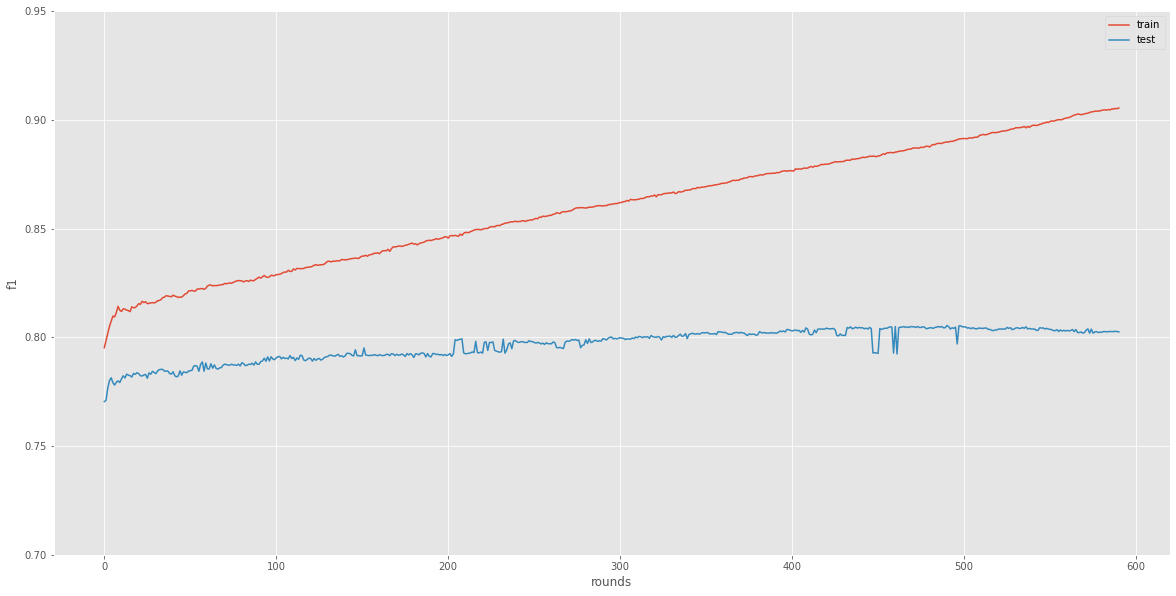

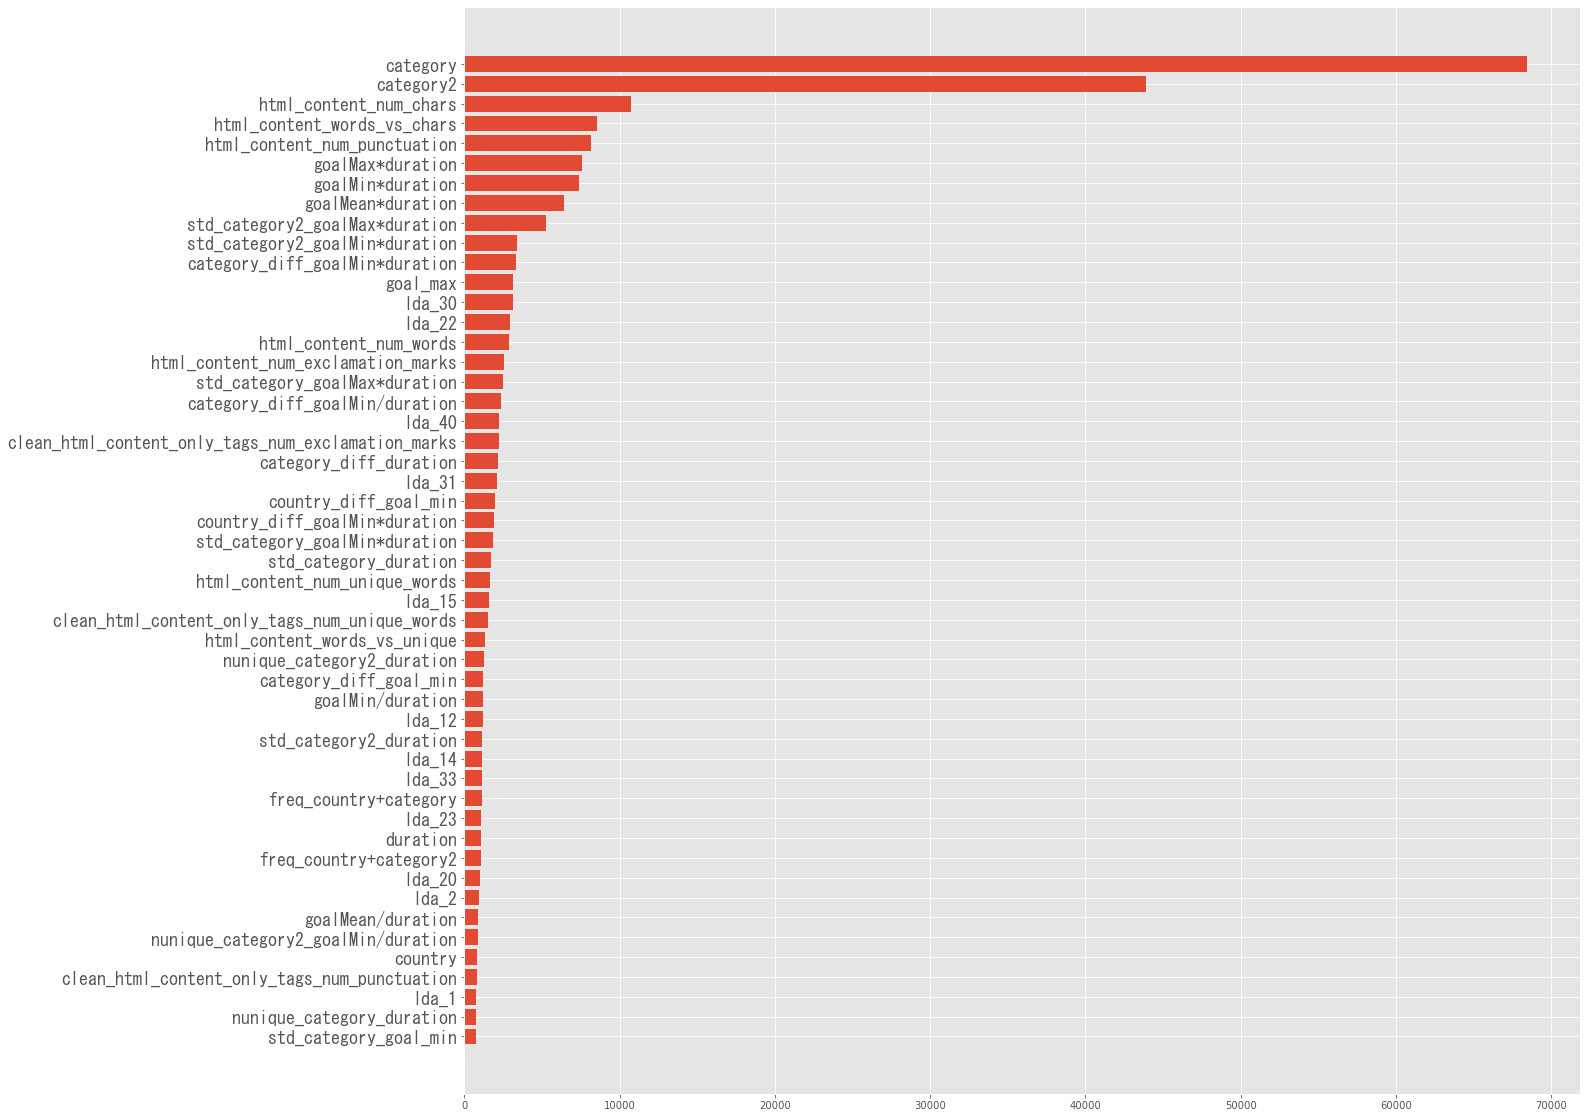

In [88]:
# Â≠¶Áøí‰∏≠„ÅÆË©ï‰æ°ÁµêÊûú„ÇíÂèñ„ÇäÂá∫„Åô
eval_results = lgb_normal.evals_result_
train_metrics = eval_results["training"]["f1"]
test_metrics = eval_results["valid_1"]["f1"]

# Â≠¶ÁøíÊõ≤Á∑ö„Çí„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(20, 10))

plt.plot(train_metrics)
plt.plot(test_metrics)

plt.legend(["train", "test"])
plt.xlabel('rounds')
plt.ylabel('f1')
plt.ylim(0.7, 0.95)
plt.show()

# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÊäΩÂá∫
importances = lgb_normal.feature_importances_
# ÈáçË¶ÅÂ∫¶„ÅÆÈôçÈ†Ü„ÅßÂÖÉ„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÊäΩÂá∫
indices = np.argsort(importances)[::-1]

# ‰∏ä‰Ωç40ÂÄã„ÅÆÈáçË¶ÅÂ∫¶
indices_selected = indices[:50]
# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„Çí„Éó„É≠„ÉÉ„Éà
fig, ax = plt.subplots(1, 1, figsize=(20,20))
ax.barh(range(indices_selected.shape[0]), importances[indices_selected])
plt.yticks(range(indices_selected.shape[0]), X.columns[indices_selected], fontname="MS Gothic", fontsize=18)
ax.invert_yaxis()
plt.show()

In [92]:
# „Çπ„Ç≥„Ç¢
scores = cv_score_GB_tar(lgb_normal, X, early_stopping_rounds=100)
print(scores)
print(np.mean(scores), np.std(scores))

[0.7798036465638148, 0.7845355964167845, 0.7938432835820896, 0.795668549905838, 0.7865796831314072]
0.7880861519199869 0.005901069593860561


### „Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [93]:
# hyperopt„Çí‰Ωø„Å£„Åü„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢

In [94]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import log_loss

In [98]:
# „Éë„É©„É°„Éº„Çø„ÇíÂºïÊï∞„Å´„Å®„Çä„ÄÅË©ï‰æ°„ÇíËøî„ÅôÈñ¢Êï∞„ÇíÂÆöÁæ©

def score(space):
    classifier = lgb.LGBMClassifier(n_estimators = 3000,                                   
                                    learning_rate = 0.01,
                                    max_depth = int(space['max_depth']),                                   
                                    min_child_weight = space['min_child_weight'],
                                    num_leaves = int(space['num_leaves']),
                                    subsample = space['subsample'],
                                    colsample_bytree = space['colsample_bytree'],
                                    reg_alpha = space['reg_alpha'],
                                    reg_lambda = space['reg_lambda'],
                                    random_state=111,
                                   )
    # 1-fold
    tr_x = tr_x_dict["fold_{}".format(0)]
    va_x = va_x_dict["fold_{}".format(0)]
    tr_y = tr_y_dict["fold_{}".format(0)]
    va_y = va_y_dict["fold_{}".format(0)]
    classifier.fit(tr_x,
                   tr_y,
                   eval_set=[(tr_x, tr_y), (va_x, va_y)], 
                   early_stopping_rounds=100,
                   verbose=False)
    va_pred = classifier.predict(va_x)
    score = f1_score(va_pred, va_y)
    
    # Cross Validation
#     scores = cv_score_GB_tar(classifier, early_stopping_rounds=100)
#     score = np.mean(scores)
    
    print(f'params: {space}, f1: {score:.4f}')

    # ÊÉÖÂ†±„ÇíË®òÈå≤„Åó„Å¶„Åä„Åè
    history.append((space, score))

    return{'loss':1-score, 'status': STATUS_OK }

In [99]:
%%time

# Êé¢Á¥¢„Åô„Çã„Éë„É©„É°„Éº„Çø„ÅÆÁ©∫Èñì„ÇíÊåáÂÆö„Åô„Çã
space = {
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.1), np.log(10)),
    'max_depth': hp.quniform('max_depth', 3, 9, 1),
    "num_leaves": hp.quniform('num_leaves', 30, 120, 2),
    'subsample': hp.quniform('subsample', 0.6, 0.95, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
    'reg_alpha' : hp.loguniform('reg_alpha', np.log(1e-8), np.log(1.0)),
    'reg_lambda' : hp.loguniform('reg_lambda', np.log(1e-6), np.log(10.0)),
}

# hyperopt„Å´„Çà„Çã„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢„ÅÆÂÆüË°å
max_evals = 10
trials = Trials()
history = []
fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# Ë®òÈå≤„Åó„ÅüÊÉÖÂ†±„Åã„Çâ„Éë„É©„É°„Éº„Çø„Å®„Çπ„Ç≥„Ç¢„ÇíÂá∫Âäõ„Åô„Çã
history = sorted(history, key=lambda tpl: tpl[1], reverse=True)
best = history[0]
print()
print(f'best params:{best[0]}, score:{best[1]:.4f}')

params: {'colsample_bytree': 0.75, 'max_depth': 7.0, 'min_child_weight': 0.14078562730987704, 'num_leaves': 50.0, 'reg_alpha': 0.00014013391020459615, 'reg_lambda': 0.05281091905097486, 'subsample': 0.9}, f1: 0.7823
params: {'colsample_bytree': 0.75, 'max_depth': 7.0, 'min_child_weight': 9.912866222229141, 'num_leaves': 116.0, 'reg_alpha': 2.1286122572693673e-05, 'reg_lambda': 0.7215158491517537, 'subsample': 0.75}, f1: 0.7815
params: {'colsample_bytree': 0.7000000000000001, 'max_depth': 9.0, 'min_child_weight': 5.563733856374147, 'num_leaves': 38.0, 'reg_alpha': 0.05256002183927093, 'reg_lambda': 2.961017377736614, 'subsample': 0.8500000000000001}, f1: 0.7817
params: {'colsample_bytree': 0.6000000000000001, 'max_depth': 6.0, 'min_child_weight': 5.499367665569831, 'num_leaves': 58.0, 'reg_alpha': 0.0490850193053766, 'reg_lambda': 0.8034699899208446, 'subsample': 0.8}, f1: 0.7858
params: {'colsample_bytree': 0.8, 'max_depth': 4.0, 'min_child_weight': 0.45418204893580566, 'num_leaves': 1

### re-modeling

In [100]:
best_lgb = best[0]

In [101]:
lgb_model = lgb.LGBMClassifier(learning_rate=0.05,
                               n_estimators=2000,
                               random_state=7,
                               n_jobs=-1,
                               importance_type="total_gain",
                               max_depth=int(best_lgb["max_depth"]), 
                               num_leaves=int(best_lgb["num_leaves"]),
                               colsample_bytree=best_lgb["colsample_bytree"],
                               subsample=best_lgb["subsample"],
                               reg_lambda=best_lgb["reg_lambda"],
                               reg_alpha=best_lgb["reg_alpha"],
                               min_child_weight=best_lgb["min_child_weight"],                           
                              )

## XGBoost

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

xgb_normal = xgb.XGBClassifier(learning_rate=0.01,
                              n_estimators=2000,
                              max_depth=3, 
                              colsample_bytree=1.0,
                              colsample_bylevel=0.3,
                              subsample=0.9,
                              gamma=0,
                              reg_lambda=1,
                              reg_alpha=0,
                              min_child_weight=1,                             
                              random_state=7,
                              n_jobs=-1,
                              importance_type="total_gain",
                             )
xgb_normal.fit(X_train,
               y_train, 
               #eval_metric=optimized_f1,
               eval_set=[(X_train, y_train), (X_test, y_test)], 
               early_stopping_rounds=100)

[0]	validation_0-error:0.25797	validation_1-error:0.25446
Multiple eval metrics have been passed: 'validation_1-error' will be used for early stopping.

Will train until validation_1-error hasn't improved in 100 rounds.
[1]	validation_0-error:0.26644	validation_1-error:0.26963
[2]	validation_0-error:0.24659	validation_1-error:0.24573
[3]	validation_0-error:0.24191	validation_1-error:0.24687
[4]	validation_0-error:0.24393	validation_1-error:0.25028
[5]	validation_0-error:0.24140	validation_1-error:0.24915
[6]	validation_0-error:0.24153	validation_1-error:0.24953
[7]	validation_0-error:0.24431	validation_1-error:0.25142
[8]	validation_0-error:0.24418	validation_1-error:0.25256
[9]	validation_0-error:0.23976	validation_1-error:0.24005
[10]	validation_0-error:0.24583	validation_1-error:0.25218
[11]	validation_0-error:0.24014	validation_1-error:0.24346
[12]	validation_0-error:0.24165	validation_1-error:0.24687
[13]	validation_0-error:0.24089	validation_1-error:0.24611
[14]	validation_0-erro

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.3,
              colsample_bynode=1, colsample_bytree=1.0, gamma=0, gpu_id=-1,
              importance_type='total_gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=2000, n_jobs=-1, num_parallel_tree=1, random_state=7,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

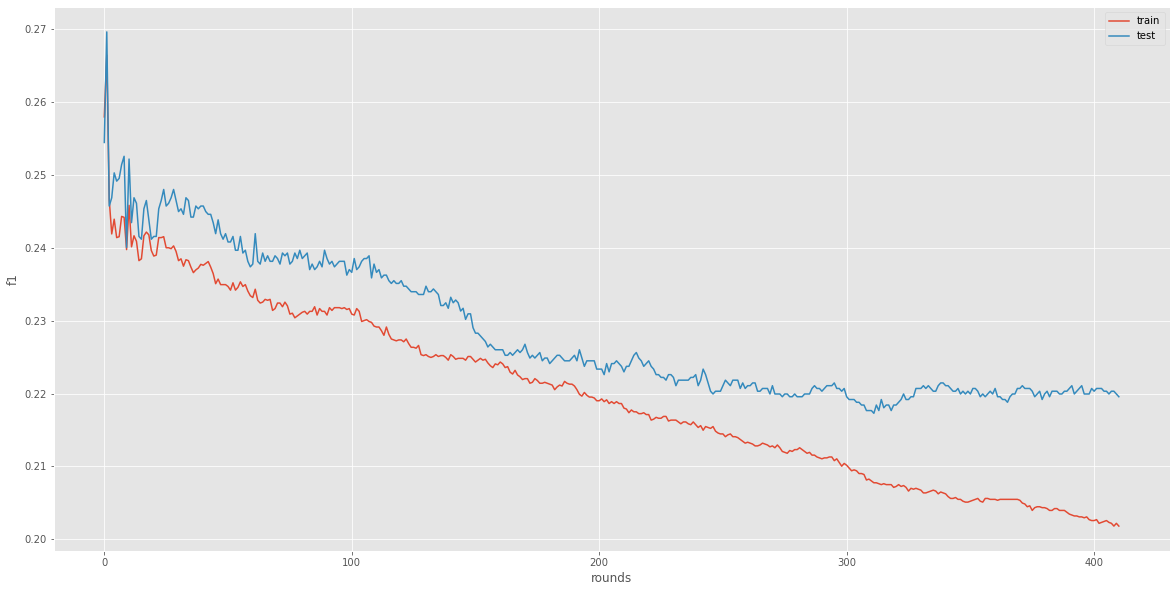

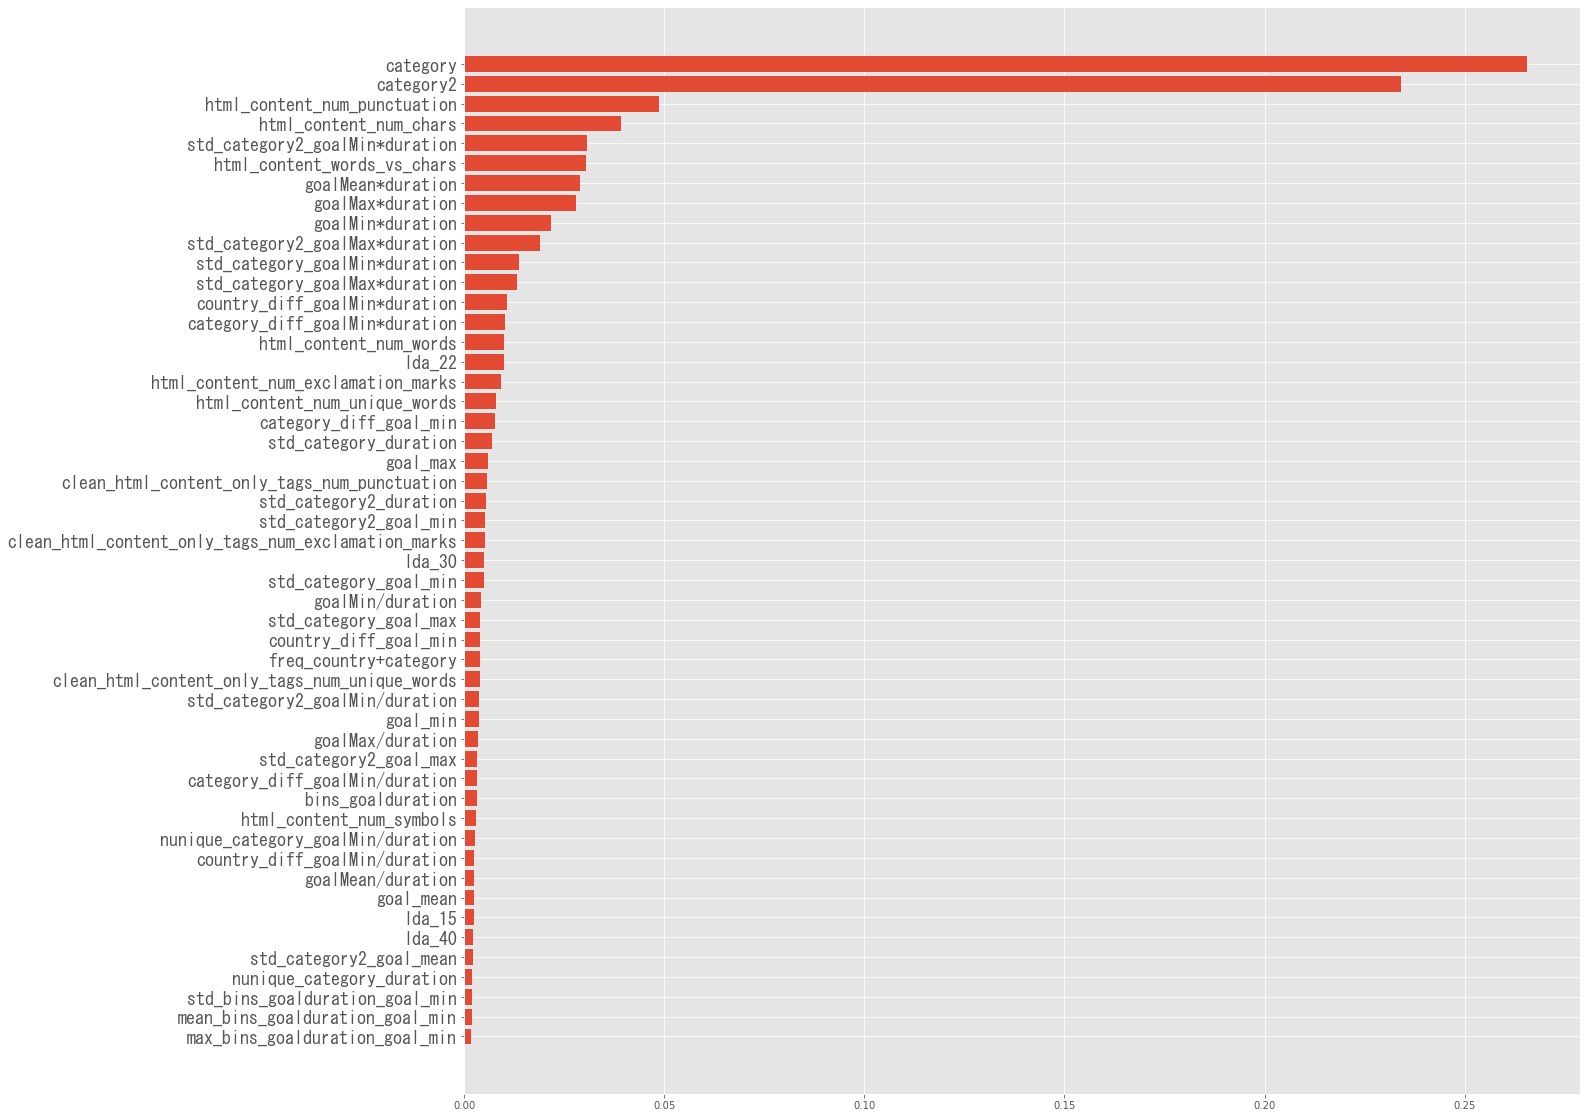

In [103]:
# Â≠¶Áøí‰∏≠„ÅÆË©ï‰æ°ÁµêÊûú„ÇíÂèñ„ÇäÂá∫„Åô
eval_results = xgb_normal.evals_result_
train_metrics = eval_results["validation_0"]["error"]
test_metrics = eval_results["validation_1"]["error"]

# Â≠¶ÁøíÊõ≤Á∑ö„Çí„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(20, 10))

plt.plot(train_metrics)
plt.plot(test_metrics)

plt.legend(["train", "test"])
plt.xlabel('rounds')
plt.ylabel('f1')
#plt.ylim(0.7, 0.95)
plt.show()


# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„ÇíÊäΩÂá∫
importances = xgb_normal.feature_importances_
# ÈáçË¶ÅÂ∫¶„ÅÆÈôçÈ†Ü„ÅßÂÖÉ„ÅÆ„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„ÇíÊäΩÂá∫
indices = np.argsort(importances)[::-1]

# ‰∏ä‰Ωç40ÂÄã„ÅÆÈáçË¶ÅÂ∫¶
indices_selected = indices[:50]
# ÁâπÂæ¥Èáè„ÅÆÈáçË¶ÅÂ∫¶„Çí„Éó„É≠„ÉÉ„Éà
fig, ax = plt.subplots(1, 1, figsize=(20,20))
ax.barh(range(indices_selected.shape[0]), importances[indices_selected])
plt.yticks(range(indices_selected.shape[0]), X.columns[indices_selected], fontname="MS Gothic", fontsize=18)
ax.invert_yaxis()
plt.show()

In [105]:
# „Çπ„Ç≥„Ç¢
scores = cv_score_GB_tar(xgb_normal, X,  eval_metric=None, early_stopping_rounds=100)
print(scores)
print(np.mean(scores), np.std(scores))

[0.7840707964601771, 0.7935368043087973, 0.7946157186278768, 0.7883853937527496, 0.7854609929078014]
0.7892139412114804 0.00422112294084761


### „Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [106]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.metrics import log_loss

In [107]:
# hyperopt„Çí‰Ωø„Å£„Åü„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢

def score(space):
    classifier = xgb.XGBClassifier(n_estimators = 2000,                                   
                                   learning_rate = 0.05,
                                   max_depth = int(space['max_depth']),                                   
                                   min_child_weight = space['min_child_weight'],
                                   subsample = space['subsample'],
                                   colsample_bytree = space['colsample_bytree'],
                                   gamma = space['gamma'],
                                   reg_alpha = space['reg_alpha'],
                                   reg_lambda = space['reg_lambda'],
                                   random_state=111,
                                  )
    # 1-fold
    tr_x = tr_x_dict["fold_{}".format(1)]
    va_x = va_x_dict["fold_{}".format(1)]
    tr_y = tr_y_dict["fold_{}".format(1)]
    va_y = va_y_dict["fold_{}".format(1)]
    classifier.fit(tr_x,
                   tr_y,
                   eval_set=[(tr_x, tr_y), (va_x, va_y)], 
                   early_stopping_rounds=100,
                   verbose=False)
    va_pred = classifier.predict(va_x)
    score = f1_score(va_pred, va_y)
    
        # Cross Validation
#     scores = cv_score_GB_tar(classifier, early_stopping_rounds=100)
#     score = np.mean(scores)
    
    print(f'params: {space}, f1: {score:.4f}')

    # ÊÉÖÂ†±„ÇíË®òÈå≤„Åó„Å¶„Åä„Åè
    history.append((space, score))

    return{'loss':1-score, 'status': STATUS_OK }

In [108]:
%%time

# Êé¢Á¥¢„Åô„Çã„Éë„É©„É°„Éº„Çø„ÅÆÁ©∫Èñì„ÇíÊåáÂÆö„Åô„Çã
space = {
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.1), np.log(10)),
    'max_depth': hp.quniform('max_depth', 3, 9, 1),
    'subsample': hp.quniform('subsample', 0.6, 0.95, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
    'gamma': hp.loguniform('gamma', np.log(1e-8), np.log(1.0)),
    # ‰ΩôË£ï„Åå„ÅÇ„Çå„Å∞alpha, lambda„ÇÇË™øÊï¥„Åô„Çã
    'reg_alpha' : hp.loguniform('reg_alpha', np.log(1e-8), np.log(1.0)),
    'reg_lambda' : hp.loguniform('reg_lambda', np.log(1e-6), np.log(10.0)),
}

# hyperopt„Å´„Çà„Çã„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢„ÅÆÂÆüË°å
max_evals = 10
trials = Trials()
history = []
fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# Ë®òÈå≤„Åó„ÅüÊÉÖÂ†±„Åã„Çâ„Éë„É©„É°„Éº„Çø„Å®„Çπ„Ç≥„Ç¢„ÇíÂá∫Âäõ„Åô„Çã
history = sorted(history, key=lambda tpl: tpl[1], reverse=True)
best = history[0]
print()
print(f'best params:{best[0]}, score:{best[1]:.4f}')

params: {'colsample_bytree': 0.75, 'gamma': 5.34243383483575e-08, 'max_depth': 5.0, 'min_child_weight': 1.1362877717802293, 'reg_alpha': 0.6538278239588348, 'reg_lambda': 0.0016649180580752545, 'subsample': 0.9}, f1: 0.7857
params: {'colsample_bytree': 0.8, 'gamma': 0.029339404050561325, 'max_depth': 7.0, 'min_child_weight': 0.19335993004263785, 'reg_alpha': 0.007047723180020446, 'reg_lambda': 0.23173313150727945, 'subsample': 0.75}, f1: 0.7775
params: {'colsample_bytree': 0.8, 'gamma': 2.6075508598490707e-07, 'max_depth': 9.0, 'min_child_weight': 4.631987575497699, 'reg_alpha': 0.22684918029720186, 'reg_lambda': 1.3439429644957872e-06, 'subsample': 0.7000000000000001}, f1: 0.7842
params: {'colsample_bytree': 0.8, 'gamma': 0.0003919963428842725, 'max_depth': 4.0, 'min_child_weight': 0.11258736210565515, 'reg_alpha': 0.03149073330732924, 'reg_lambda': 0.0002129973262181042, 'subsample': 0.8500000000000001}, f1: 0.7868
params: {'colsample_bytree': 0.8, 'gamma': 3.7340420445786233e-07, 'm

### re-modeling

In [109]:
best_xgb = best

In [110]:
xgb_model = xgb.XGBClassifier(learning_rate=0.05,
                               n_estimators=2000,
                               random_state=7,
                               n_jobs=-1,
                               importance_type="total_gain",
                               max_depth=int(best_xgb[0]["max_depth"]), 
                               colsample_bytree=best_xgb[0]["colsample_bytree"],
                               subsample=best_xgb[0]["subsample"],
                               gamma=best_xgb[0]["gamma"],
                               reg_lambda=best_xgb[0]["reg_lambda"],
                               reg_alpha=best_xgb[0]["reg_alpha"],
                               min_child_weight=best_xgb[0]["min_child_weight"],                           
                              )

## ÁâπÂæ¥ÈáèÈÅ∏Êäû

In [111]:
# ÁâπÂæ¥ÈáèÈÅ∏Êäû
X_selected = X[X.columns[indices[:30]]] # ÊÆã„ÅôÁâπÂæ¥Èáè„ÅÆÊï∞„ÇíÊåáÂÆö
test_selected = test[X_selected.columns]
X_selected.shape

(10545, 30)

In [113]:
# „Çπ„Ç≥„Ç¢
scores = cv_score_GB_tar(lgb_normal, X_selected, early_stopping_rounds=100)
print(scores)
print(np.mean(scores), np.std(scores))

[0.7880143112701252, 0.7803065490013934, 0.7973094170403586, 0.7870544090056285, 0.7968963943404839]
0.789916216131598 0.006442595625782862


### „Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [114]:
# hyperopt„Çí‰Ωø„Å£„Åü„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢

def score(space):
    classifier = lgb.LGBMClassifier(n_estimators = 3000,                                   
                                    learning_rate = 0.01,
                                    max_depth = int(space['max_depth']),                                   
                                    min_child_weight = space['min_child_weight'],
                                    num_leaves = int(space['num_leaves']),
                                    subsample = space['subsample'],
                                    colsample_bytree = space['colsample_bytree'],
                                    reg_alpha = space['reg_alpha'],
                                    reg_lambda = space['reg_lambda'],
                                    random_state=111,
                                   )
    # 1-fold
    tr_x = tr_x_dict["fold_{}".format(3)][X_selected.columns]
    va_x = va_x_dict["fold_{}".format(3)][X_selected.columns]
    tr_y = tr_y_dict["fold_{}".format(3)]
    va_y = va_y_dict["fold_{}".format(3)]
    classifier.fit(tr_x,
                   tr_y,
                   eval_set=[(tr_x, tr_y), (va_x, va_y)], 
                   early_stopping_rounds=100,
                   verbose=False)
    va_pred = classifier.predict(va_x)
    score = f1_score(va_pred, va_y)
    
        # Cross Validation
#     scores = cv_score_GB_tar(classifier, early_stopping_rounds=100)
#     score = np.mean(scores)
    
    print(f'params: {space}, f1: {score:.4f}')

    # ÊÉÖÂ†±„ÇíË®òÈå≤„Åó„Å¶„Åä„Åè
    history.append((space, score))

    return{'loss':1-score, 'status': STATUS_OK }

In [115]:
%%time

# Êé¢Á¥¢„Åô„Çã„Éë„É©„É°„Éº„Çø„ÅÆÁ©∫Èñì„ÇíÊåáÂÆö„Åô„Çã
space = {
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.1), np.log(10)),
    'max_depth': hp.quniform('max_depth', 3, 9, 1),
    "num_leaves": hp.quniform('num_leaves', 30, 120, 2),
    'subsample': hp.quniform('subsample', 0.6, 0.95, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
    # ‰ΩôË£ï„Åå„ÅÇ„Çå„Å∞alpha, lambda„ÇÇË™øÊï¥„Åô„Çã
    'reg_alpha' : hp.loguniform('reg_alpha', np.log(1e-8), np.log(1.0)),
    'reg_lambda' : hp.loguniform('reg_lambda', np.log(1e-6), np.log(10.0)),
}

# hyperopt„Å´„Çà„Çã„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢„ÅÆÂÆüË°å
max_evals = 50
trials = Trials()
history = []
fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# Ë®òÈå≤„Åó„ÅüÊÉÖÂ†±„Åã„Çâ„Éë„É©„É°„Éº„Çø„Å®„Çπ„Ç≥„Ç¢„ÇíÂá∫Âäõ„Åô„Çã
history = sorted(history, key=lambda tpl: tpl[1], reverse=True)
best = history[0]
print()
print(f'best params:{best[0]}, score:{best[1]:.4f}')

params: {'colsample_bytree': 0.9, 'max_depth': 4.0, 'min_child_weight': 3.528561535968936, 'num_leaves': 46.0, 'reg_alpha': 0.008494352380613798, 'reg_lambda': 2.0329795728963815, 'subsample': 0.9500000000000001}, f1: 0.7805
params: {'colsample_bytree': 0.65, 'max_depth': 9.0, 'min_child_weight': 0.22691116164134162, 'num_leaves': 98.0, 'reg_alpha': 1.930468913022703e-05, 'reg_lambda': 0.0019849535048909075, 'subsample': 0.7000000000000001}, f1: 0.7789
params: {'colsample_bytree': 0.9500000000000001, 'max_depth': 5.0, 'min_child_weight': 2.1078513492371203, 'num_leaves': 98.0, 'reg_alpha': 0.0034473184150022726, 'reg_lambda': 7.52320143420683e-06, 'subsample': 0.9}, f1: 0.7851
params: {'colsample_bytree': 0.65, 'max_depth': 9.0, 'min_child_weight': 2.1073199892009646, 'num_leaves': 68.0, 'reg_alpha': 0.13434789587769022, 'reg_lambda': 4.724933965466985e-05, 'subsample': 0.8500000000000001}, f1: 0.7818
params: {'colsample_bytree': 0.7000000000000001, 'max_depth': 5.0, 'min_child_weight'

In [116]:
best_lgb_select = best[0]

In [117]:
lgb_select_model = lgb.LGBMClassifier(learning_rate=0.01,
                                      n_estimators=3000,
                                      random_state=7,
                                      n_jobs=-1,
                                      importance_type="total_gain",
                                      max_depth=int(best_lgb_select["max_depth"]), 
                                      num_leaves=int(best_lgb_select["num_leaves"]),
                                      colsample_bytree=best_lgb_select["colsample_bytree"],
                                      subsample=best_lgb_select["subsample"],
                                      reg_lambda=best_lgb_select["reg_lambda"],
                                      reg_alpha=best_lgb_select["reg_alpha"],
                                      min_child_weight=best_lgb_select["min_child_weight"],                           
                                      )

## NN

In [118]:
import tensorflow as tf
from tensorflow import keras
from hyperopt import hp
from keras.callbacks import EarlyStopping
from keras.layers.advanced_activations import ReLU, PReLU
from keras.layers.core import Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from sklearn.preprocessing import StandardScaler

import os
os.environ['HDF5_DISABLE_VERSION_CHECK']='1'

In [120]:
# „Çπ„Ç±„Éº„É™„É≥„Ç∞
scaler = StandardScaler()
normed_X = scaler.fit_transform(X)
normed_test = scaler.transform(test)

# „É¢„Éá„É´ÊßãÁØâ
np.random.seed(28)
tf.random.set_seed(73)

def buit_model():
    model = Sequential()
    
    model.add(Dense(96, activation="relu", input_shape=(normed_X.shape[1],)))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(96, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(96, activation="relu"))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())
    model.add(Dense(1, activation="sigmoid"))
    
    optimizer = Adam(learning_rate=0.00005)
    
    model.compile(optimizer=optimizer,
                  loss="binary_crossentropy",
                  metrics=["accuracy"])
    return model

model = buit_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 96)                57600     
_________________________________________________________________
dropout (Dropout)            (None, 96)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 96)                384       
_________________________________________________________________
dense_1 (Dense)              (None, 96)                9312      
_________________________________________________________________
dropout_1 (Dropout)          (None, 96)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 96)                384       
_________________________________________________________________
dense_2 (Dense)              (None, 96)                9

In [121]:
# „É¢„Éá„É´„ÅÆÂ≠¶Áøí
# patience „ÅØÊîπÂñÑ„ÅåË¶ã„Çâ„Çå„Çã„Åã„ÇíÁõ£Ë¶ñ„Åô„Çã„Ç®„Éù„ÉÉ„ÇØÊï∞„ÇíË°®„Åô„Éë„É©„É°„Éº„Çø„Éº
early_stop = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

history = model.fit(normed_X, y,
                    batch_size=64,
                    epochs=1000,
                    verbose=1,
                    validation_split=0.1,
                    callbacks=[early_stop])

Epoch 1/1000
149/149 [==============================] - 1s 9ms/step - loss: 0.7304 - accuracy: 0.5767 - val_loss: 0.6023 - val_accuracy: 0.6682
Epoch 2/1000
149/149 [==============================] - 1s 8ms/step - loss: 0.6680 - accuracy: 0.6293 - val_loss: 0.5673 - val_accuracy: 0.6882
Epoch 3/1000
149/149 [==============================] - 1s 6ms/step - loss: 0.6298 - accuracy: 0.6649 - val_loss: 0.5478 - val_accuracy: 0.7166
Epoch 4/1000
149/149 [==============================] - 1s 5ms/step - loss: 0.6071 - accuracy: 0.6838 - val_loss: 0.5323 - val_accuracy: 0.7374
Epoch 5/1000
149/149 [==============================] - 1s 6ms/step - loss: 0.5873 - accuracy: 0.6974 - val_loss: 0.5256 - val_accuracy: 0.7327
Epoch 6/1000
149/149 [==============================] - 1s 6ms/step - loss: 0.5703 - accuracy: 0.7064 - val_loss: 0.5189 - val_accuracy: 0.7431
Epoch 7/1000
149/149 [==============================] - 1s 6ms/step - loss: 0.5615 - accuracy: 0.7194 - val_loss: 0.5124 - val_accuracy:

       loss  accuracy  val_loss  val_accuracy
0  0.730396  0.576712  0.602313      0.668246
1  0.667998  0.629294  0.567335      0.688152
2  0.629783  0.664910  0.547797      0.716588
3  0.607140  0.683772  0.532348      0.737441
4  0.587348  0.697366  0.525648      0.732701


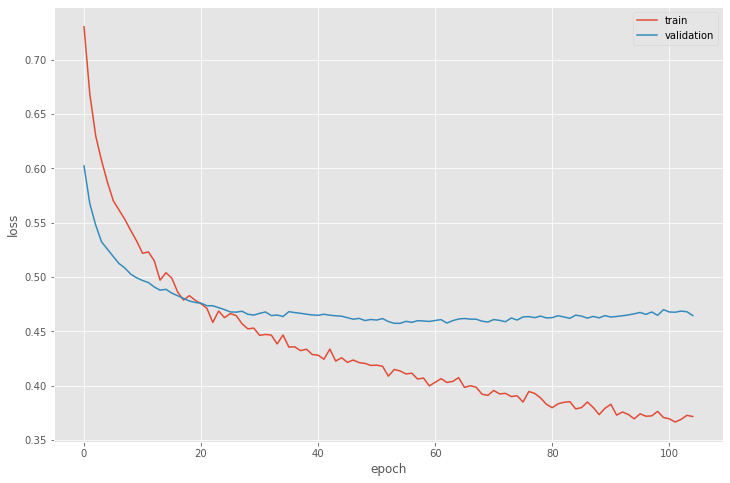

In [122]:
# Â≠¶ÁøíÊõ≤Á∑ö
hist_df = pd.DataFrame(history.history)
print(hist_df.head())

# epoch„Å®„Çπ„Ç≥„Ç¢„Çí„Éó„É≠„ÉÉ„Éà
plt.figure(figsize=(12,8))
plt.plot(hist_df["loss"], label="train")
plt.plot(hist_df["val_loss"], label="validation")
plt.legend()
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

### „Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [123]:
# fit„ÅßÂ≠¶Áøí„Åó„ÄÅpredict„Åß‰∫àÊ∏¨Á¢∫Áéá„ÇíËøî„Åô„ÇØ„É©„Çπ„ÇíÂÆöÁæ©
class MLP:

    def __init__(self, params):
        self.params = params
        self.scaler = None
        self.model = None

    def fit(self, tr_x, tr_y, test_x):

        # „Éë„É©„É°„Éº„Çø
        input_dropout = self.params['input_dropout']
        hidden_layers = int(self.params['hidden_layers'])
        hidden_units = int(self.params['hidden_units'])
        hidden_activation = self.params['hidden_activation']
        hidden_dropout = self.params['hidden_dropout']
        batch_norm = self.params['batch_norm']
        optimizer_type = self.params['optimizer']['type']
        optimizer_lr = self.params['optimizer']['lr']
        batch_size = int(self.params['batch_size'])

        # Ê®ôÊ∫ñÂåñ
        self.scaler = StandardScaler().fit(pd.concat([tr_x, test_x]))
        tr_x = self.scaler.transform(tr_x)

        self.model = Sequential()

        # ÂÖ•ÂäõÂ±§
        self.model.add(Dropout(input_dropout, input_shape=(tr_x.shape[1],)))

        # ‰∏≠ÈñìÂ±§
        for i in range(hidden_layers):
            self.model.add(Dense(hidden_units))
            if batch_norm == 'before_act':
                self.model.add(BatchNormalization())
            if hidden_activation == 'prelu':
                self.model.add(PReLU())
            elif hidden_activation == 'relu':
                self.model.add(ReLU())
            else:
                raise NotImplementedError
            self.model.add(Dropout(hidden_dropout))

        # Âá∫ÂäõÂ±§
        self.model.add(Dense(1, activation='sigmoid'))

        # „Ç™„Éó„ÉÜ„Ç£„Éû„Ç§„Ç∂
        if optimizer_type == 'sgd':
            optimizer = SGD(lr=optimizer_lr, decay=1e-6, momentum=0.9, nesterov=True)
        elif optimizer_type == 'adam':
            optimizer = Adam(lr=optimizer_lr, beta_1=0.9, beta_2=0.999, decay=0.)
        else:
            raise NotImplementedError

        # ÁõÆÁöÑÈñ¢Êï∞„ÄÅË©ï‰æ°ÊåáÊ®ô„Å™„Å©„ÅÆË®≠ÂÆö
        self.model.compile(loss='binary_crossentropy',
                           optimizer=optimizer, metrics=['accuracy'])

        # „Ç®„Éù„ÉÉ„ÇØÊï∞„ÄÅ„Ç¢„Éº„É™„Éº„Çπ„Éà„ÉÉ„Éî„É≥„Ç∞
        # „ÅÇ„Åæ„Çäepoch„ÇíÂ§ß„Åç„Åè„Åô„Çã„Å®„ÄÅÂ∞è„Åï„ÅÑÂ≠¶ÁøíÁéá„ÅÆ„Å®„Åç„Å´ÁµÇ„Çè„Çâ„Å™„ÅÑ„Åì„Å®„Åå„ÅÇ„Çã„ÅÆ„ÅßÊ≥®ÊÑè
        nb_epoch = 1000
        patience = 50
        early_stopping = EarlyStopping(patience=patience, restore_best_weights=True)

        # Â≠¶Áøí„ÅÆÂÆüË°å
        history = self.model.fit(tr_x, tr_y,
                                 epochs=nb_epoch,
                                 batch_size=batch_size,
                                 verbose=0,
                                 validation_split=0.1,
                                 callbacks=[early_stopping])

    def predict(self, x):
        # ‰∫àÊ∏¨
        x = self.scaler.transform(x)
        y_pred = self.model.predict(x)
        y_pred = y_pred.flatten()
        return y_pred

In [128]:
# „Éë„É©„É°„Éº„Çø„Çí‰∏é„Åà„Åü„Å®„Åç„Å´„ÄÅË©ï‰æ°ÊåáÊ®ô„ÇíËøî„ÅôÈñ¢Êï∞„ÇíÂÆöÁæ©
from hyperopt import fmin, tpe, STATUS_OK, Trials
from sklearn.metrics import log_loss

def score(params):
    
    # 1-fold
    tr_x = tr_x_dict["fold_{}".format(2)]
    va_x = va_x_dict["fold_{}".format(2)]
    tr_y = tr_y_dict["fold_{}".format(2)]
    va_y = va_y_dict["fold_{}".format(2)]
    
    model = MLP(params)
    model.fit(tr_x, tr_y, va_x)
    va_pred = model.predict(va_x)
    score = log_loss(va_y, va_pred)
    print(f'params: {params}, logloss: {score:.4f}')

    # ÊÉÖÂ†±„ÇíË®òÈå≤„Åó„Å¶„Åä„Åè
    history.append((params, score))

    return {'loss': score, 'status': STATUS_OK}

In [129]:
%%time

# „Éë„É©„É°„Éº„ÇøÁ©∫Èñì
space = {
    'input_dropout': hp.quniform('input_dropout', 0, 0.2, 0.05),
    'hidden_layers': hp.quniform('hidden_layers', 2, 4, 1),
    'hidden_units': hp.quniform('hidden_units', 32, 256, 32),
    'hidden_activation': hp.choice('hidden_activation', ['prelu', 'relu']),
    'hidden_dropout': hp.quniform('hidden_dropout', 0, 0.3, 0.05),
    'batch_norm': hp.choice('batch_norm', ['before_act', 'no']),
    'optimizer': hp.choice('optimizer', [{'type': 'adam', 'lr': 0.00005}, {'type': 'sgd', 'lr': 0.00005}]),
    'batch_size': hp.quniform('batch_size', 32, 128, 32),
}

# „Éë„É©„É°„Éº„ÇøÊé¢Á¥¢„ÅÆÂÆüË°å
max_evals = 10
trials = Trials()
history = []
fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# Ë®òÈå≤„Åó„ÅüÊÉÖÂ†±„Åã„Çâ„Éë„É©„É°„Éº„Çø„Å®„Çπ„Ç≥„Ç¢„ÇíÂá∫Âäõ„Åô„Çã
history = sorted(history, key=lambda tpl: tpl[1])
best = history[0]
print()
print(f'best params:{best[0]}, score:{best[1]:.4f}')

params: {'batch_norm': 'before_act', 'batch_size': 96.0, 'hidden_activation': 'prelu', 'hidden_dropout': 0.30000000000000004, 'hidden_layers': 2.0, 'hidden_units': 64.0, 'input_dropout': 0.05, 'optimizer': {'lr': 5e-05, 'type': 'adam'}}, logloss: 0.4399
params: {'batch_norm': 'no', 'batch_size': 64.0, 'hidden_activation': 'prelu', 'hidden_dropout': 0.1, 'hidden_layers': 3.0, 'hidden_units': 64.0, 'input_dropout': 0.2, 'optimizer': {'lr': 5e-05, 'type': 'sgd'}}, logloss: 0.4452
params: {'batch_norm': 'before_act', 'batch_size': 64.0, 'hidden_activation': 'relu', 'hidden_dropout': 0.25, 'hidden_layers': 3.0, 'hidden_units': 32.0, 'input_dropout': 0.1, 'optimizer': {'lr': 5e-05, 'type': 'adam'}}, logloss: 0.4423
params: {'batch_norm': 'before_act', 'batch_size': 128.0, 'hidden_activation': 'relu', 'hidden_dropout': 0.1, 'hidden_layers': 3.0, 'hidden_units': 256.0, 'input_dropout': 0.2, 'optimizer': {'lr': 5e-05, 'type': 'sgd'}}, logloss: 0.4556
params: {'batch_norm': 'before_act', 'batch_

### re-modeling

In [130]:
best_nn = best[0]

nn_model = MLP(best_nn)

## ÂÖ®„Å¶Label Eccoding„ÅÆÂ†¥Âêà

In [132]:
# Label Eccoding
from sklearn.preprocessing import LabelEncoder

all_df_label = all_df.copy().drop(columns=["id", "goal", "html_content"])
cols = all_df_label.columns[(all_df_label.dtypes=="object") | (all_df_label.dtypes=="bool")]
lb = LabelEncoder()
for col in cols:
    all_df_label[col] = lb.fit_transform(all_df_label[col])

# „Éá„Éº„ÇøÂàÜÂâ≤
train_label = all_df_label[all_df_label["state"].notnull()]
test_label = all_df_label[all_df_label["state"].isnull()].drop(columns=["state"])

X_label = train_label.drop(columns=["state"])
y_label = train_label["state"]

### „Éë„É©„É°„Éº„Çø„ÉÅ„É•„Éº„Éã„É≥„Ç∞

In [133]:
# hyperopt„Çí‰Ωø„Å£„Åü„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢

def score(space):
    classifier = lgb.LGBMClassifier(n_estimators = 3000,                                   
                                    learning_rate = 0.01,
                                    max_depth = int(space['max_depth']),                                   
                                    min_child_weight = space['min_child_weight'],
                                    num_leaves = int(space['num_leaves']),
                                    subsample = space['subsample'],
                                    colsample_bytree = space['colsample_bytree'],
                                    reg_alpha = space['reg_alpha'],
                                    reg_lambda = space['reg_lambda'],
                                    random_state=111,
                                   )
    # 1-fold
    tr_x, va_x, tr_y, va_y = train_test_split(X_label, y, random_state=9)
    classifier.fit(tr_x,
                   tr_y,
                   eval_set=[(tr_x, tr_y), (va_x, va_y)], 
                   early_stopping_rounds=100,
                   verbose=False)
    va_pred = classifier.predict(va_x)
    score = f1_score(va_pred, va_y)
    
        # Cross Validation
#     scores = cv_score_GB_tar(classifier, early_stopping_rounds=100)
#     score = np.mean(scores)
    
    print(f'params: {space}, f1: {score:.4f}')

    # ÊÉÖÂ†±„ÇíË®òÈå≤„Åó„Å¶„Åä„Åè
    history.append((space, score))

    return{'loss':1-score, 'status': STATUS_OK }

In [136]:
%%time

# Êé¢Á¥¢„Åô„Çã„Éë„É©„É°„Éº„Çø„ÅÆÁ©∫Èñì„ÇíÊåáÂÆö„Åô„Çã
space = {
    'min_child_weight': hp.loguniform('min_child_weight', np.log(0.1), np.log(10)),
    'max_depth': hp.quniform('max_depth', 3, 9, 1),
    "num_leaves": hp.quniform('num_leaves', 30, 120, 2),
    'subsample': hp.quniform('subsample', 0.6, 0.95, 0.05),
    'colsample_bytree': hp.quniform('colsample_bytree', 0.6, 0.95, 0.05),
    # ‰ΩôË£ï„Åå„ÅÇ„Çå„Å∞alpha, lambda„ÇÇË™øÊï¥„Åô„Çã
    'reg_alpha' : hp.loguniform('reg_alpha', np.log(1e-8), np.log(1.0)),
    'reg_lambda' : hp.loguniform('reg_lambda', np.log(1e-6), np.log(10.0)),
}

# hyperopt„Å´„Çà„Çã„Éë„É©„É°„Éº„ÇøÊé¢Á¥¢„ÅÆÂÆüË°å
max_evals = 10
trials = Trials()
history = []
fmin(score, space, algo=tpe.suggest, trials=trials, max_evals=max_evals)

# Ë®òÈå≤„Åó„ÅüÊÉÖÂ†±„Åã„Çâ„Éë„É©„É°„Éº„Çø„Å®„Çπ„Ç≥„Ç¢„ÇíÂá∫Âäõ„Åô„Çã
history = sorted(history, key=lambda tpl: tpl[1], reverse=True)
best = history[0]
print()
print(f'best params:{best[0]}, score:{best[1]:.4f}')

params: {'colsample_bytree': 0.8, 'max_depth': 8.0, 'min_child_weight': 9.227793506752452, 'num_leaves': 118.0, 'reg_alpha': 1.5900636239601412e-06, 'reg_lambda': 1.0653158609626023, 'subsample': 0.9}, f1: 0.7830
params: {'colsample_bytree': 0.65, 'max_depth': 5.0, 'min_child_weight': 3.4447713538639233, 'num_leaves': 74.0, 'reg_alpha': 8.195199865766895e-08, 'reg_lambda': 0.3745353867467687, 'subsample': 0.9}, f1: 0.7826
params: {'colsample_bytree': 0.8500000000000001, 'max_depth': 7.0, 'min_child_weight': 0.8143252707241523, 'num_leaves': 90.0, 'reg_alpha': 0.0073470498638121716, 'reg_lambda': 0.037990156008786934, 'subsample': 0.9}, f1: 0.7802
params: {'colsample_bytree': 0.75, 'max_depth': 5.0, 'min_child_weight': 0.29874205081270633, 'num_leaves': 86.0, 'reg_alpha': 4.334143341571856e-06, 'reg_lambda': 6.09486440842375, 'subsample': 0.9500000000000001}, f1: 0.7843
params: {'colsample_bytree': 0.75, 'max_depth': 6.0, 'min_child_weight': 1.3802519529423167, 'num_leaves': 76.0, 'reg_

### modeling

In [137]:
best_lgb_label = best[0]

lgb_label_model = lgb.LGBMClassifier(learning_rate=0.05,
                                     n_estimators=2000,
                                     random_state=7,
                                     n_jobs=-1,
                                     importance_type="total_gain",
                                     max_depth=int(best_lgb_label["max_depth"]), 
                                     num_leaves=int(best_lgb_label["num_leaves"]),
                                     colsample_bytree=best_lgb_label["colsample_bytree"],
                                     subsample=best_lgb_label["subsample"],
                                     reg_lambda=best_lgb_label["reg_lambda"],
                                     reg_alpha=best_lgb_label["reg_alpha"],
                                     min_child_weight=best_lgb_label["min_child_weight"],                           
                                    )

## „Çπ„Çø„ÉÉ„Ç≠„É≥„Ç∞

### „É¢„Éá„É´„ÇíÊï¥ÂΩ¢„Åô„Çã
fit„ÅßÂ≠¶Áøí„Åó„ÄÅpredict„Åß‰∫àÊ∏¨ÂÄ§„ÅÆÁ¢∫Áéá„ÇíÂá∫Âäõ„Åô„Çã„ÇØ„É©„Çπ„Çí‰Ωú„Çã

In [138]:
# fit„ÅßÂ≠¶Áøí„Åó„ÄÅpredict„Åß‰∫àÊ∏¨ÂÄ§„ÅÆÁ¢∫Áéá„ÇíÂá∫Âäõ„Åô„Çã„ÇØ„É©„Çπ„Å´„Åô„Çã

# lightgbm„Å´„Çà„Çã„É¢„Éá„É´
class Model_Lgb:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, test):
        X_train, X_test, y_train, y_test = train_test_split(tr_x, tr_y, random_state=2)
        model = lgb_model
        model.fit(X_train,
                  y_train, 
                  #eval_metric=,
                  eval_set=[(X_train, y_train), (X_test, y_test)], 
                  early_stopping_rounds=100,
                  verbose=0)
        
        self.model = model

    def predict(self, x):
        pred = self.model.predict_proba(x)[:,1]
        return pred
    

# xgboost„Å´„Çà„Çã„É¢„Éá„É´
class Model_Xgb:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, test):
        X_train, X_test, y_train, y_test = train_test_split(tr_x, tr_y, random_state=1)
        model = xgb_model
        model.fit(X_train,
                  y_train, 
                  #eval_metric=,
                  eval_set=[(X_train, y_train), (X_test, y_test)], 
                  early_stopping_rounds=100,
                  verbose=0)

        self.model = model

    def predict(self, x):
        pred = self.model.predict_proba(x)[:,1]
        return pred


# ÁâπÂæ¥ÈáèÈÅ∏Êäû„Å´„Çà„Çã„É¢„Éá„É´
class Model_Lgb_Select:

    def __init__(self):
        self.model = None

    def fit(self, tr_x_selected, tr_y, test):
        X_train, X_test, y_train, y_test = train_test_split(tr_x_selected, tr_y, random_state=3)
        model = lgb_select_model
        model.fit(X_train,
                  y_train, 
                  #eval_metric=,
                  eval_set=[(X_train, y_train), (X_test, y_test)], 
                  early_stopping_rounds=100,
                  verbose=0)
        
        self.model = model

    def predict(self, x_selected):
        pred = self.model.predict_proba(x_selected)[:,1]
        return pred

# „Éã„É•„Éº„É©„É´„Éç„ÉÉ„Éà„Å´„Çà„Çã„É¢„Éá„É´
class Model_NN:

    def __init__(self):
        self.model = None

    def fit(self, tr_x, tr_y, test):
        model = nn_model
        model.fit(tr_x, tr_y, test)
        self.model = model

    def predict(self, x):
        pred = self.model.predict(x).reshape(-1)
        return pred
    
# ÂÖ®„Å¶„É©„Éô„É´„Ç®„É≥„Ç≥„Éº„Éá„Ç£„É≥„Ç∞„ÅÆLGB„É¢„Éá„É´
class Model_Label:

    def __init__(self):
        self.model = None

    def fit(self, tr_x_label, tr_y, test):
        X_train, X_test, y_train, y_test = train_test_split(tr_x_label, tr_y, random_state=90)
        model = lgb_label_model
        model.fit(X_train,
                  y_train, 
                  #eval_metric=,
                  eval_set=[(X_train, y_train), (X_test, y_test)], 
                  early_stopping_rounds=100,
                  verbose=0)
        
        self.model = model

    def predict(self, x_label):
        pred = self.model.predict_proba(x_label)[:,1]
        return pred
    

# Logistic Regression„Å´„Çà„Çã„É¢„Éá„É´ÔºàÔºíÂ±§ÁõÆÔºâ
class Model_LG:

    def __init__(self):
        self.model = None
        self.scaler = None

    def fit(self, tr_x, tr_y, test):
        self.scaler = StandardScaler()
        self.scaler.fit(tr_x)
        tr_x = self.scaler.transform(tr_x)
        self.model = LogisticRegression(solver='lbfgs', C=0.01)
        self.model.fit(tr_x, tr_y)

    def predict(self, x):
        x = self.scaler.transform(x)
        pred = self.model.predict_proba(x)[:, 1]
        return pred


### „ÄåÁõÆÁöÑÂ§âÊï∞„ÇíÁü•„Çâ„Å™„ÅÑ„Äç‰∫àÊ∏¨ÂÄ§„ÇíËøî„ÅôÈñ¢Êï∞

In [139]:
from sklearn.metrics import log_loss
from sklearn.model_selection import KFold

# Â≠¶Áøí„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã„ÄåÁõÆÁöÑÂ§âÊï∞„ÇíÁü•„Çâ„Å™„ÅÑ„Äç‰∫àÊ∏¨ÂÄ§„Å®„ÄÅ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã‰∫àÊ∏¨ÂÄ§„ÇíËøî„ÅôÈñ¢Êï∞
# model„ÅØ„ÄÅfit„ÅßÂ≠¶Áøí„Åó„ÄÅpredict„Åß‰∫àÊ∏¨ÂÄ§„ÅÆÁ¢∫Áéá„ÇíÂá∫Âäõ„Åô„Çã
def predict_cv(model, train_x, train_y, test_x):
    preds = []
    preds_test = []
    va_idxes = []

    kf = KFold(n_splits=4, shuffle=True, random_state=71)

    # „ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„ÅßÂ≠¶Áøí„Éª‰∫àÊ∏¨„ÇíË°å„ÅÑ„ÄÅ‰∫àÊ∏¨ÂÄ§„Å®„Ç§„É≥„Éá„ÉÉ„ÇØ„Çπ„Çí‰øùÂ≠ò„Åô„Çã
    for i, (tr_idx, va_idx) in enumerate(kf.split(train_x)):
        tr_x, va_x = train_x.iloc[tr_idx], train_x.iloc[va_idx]
        tr_y, va_y = train_y.iloc[tr_idx], train_y.iloc[va_idx]
        model.fit(tr_x, tr_y, test)
        pred = model.predict(va_x)
        preds.append(pred)
        pred_test = model.predict(test_x)
        preds_test.append(pred_test)
        va_idxes.append(va_idx)

    # „Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã‰∫àÊ∏¨ÂÄ§„ÇíÈÄ£Áµê„Åó„ÄÅ„Åù„ÅÆÂæåÂÖÉ„ÅÆÈ†ÜÂ∫è„Å´‰∏¶„ÅπÁõ¥„Åô
    va_idxes = np.concatenate(va_idxes)
    preds = np.concatenate(preds, axis=0)
    order = np.argsort(va_idxes)
    pred_train = preds[order]

    # „ÉÜ„Çπ„Éà„Éá„Éº„Çø„Å´ÂØæ„Åô„Çã‰∫àÊ∏¨ÂÄ§„ÅÆÂπ≥Âùá„Çí„Å®„Çã
    preds_test = np.mean(preds_test, axis=0)

    return pred_train, preds_test

### „Çπ„Çø„ÉÉ„Ç≠„É≥„Ç∞„ÅÆÂÆüË°å

In [140]:
%%time

# 1Â±§ÁõÆ„ÅÆ„É¢„Éá„É´
# pred_train_1„ÅØ„ÄÅÂ≠¶Áøí„Éá„Éº„Çø„ÅÆ„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Åß„ÅÆ‰∫àÊ∏¨ÂÄ§
# pred_test_1„ÅØ„ÄÅ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÂÄ§
model_1a = Model_Lgb()
pred_train_1a, pred_test_1a = predict_cv(model_1a, X, y, test)

model_1b = Model_Xgb()
pred_train_1b, pred_test_1b = predict_cv(model_1b, X, y, test)

model_1c = Model_Lgb_Select()
pred_train_1c, pred_test_1c = predict_cv(model_1c, X_selected, y, test_selected)

model_1d = Model_NN()
pred_train_1d, pred_test_1d = predict_cv(model_1d, X, y, test)

model_1e = Model_Label()
pred_train_1e, pred_test_1e = predict_cv(model_1e, X_label, y, test_label)


# 1Â±§ÁõÆ„ÅÆ„É¢„Éá„É´„ÅÆË©ï‰æ°
print(f'logloss: {log_loss(y, pred_train_1a, eps=1e-7):.4f}')
print(f'logloss: {log_loss(y, pred_train_1b, eps=1e-7):.4f}')
print(f'logloss: {log_loss(y, pred_train_1c, eps=1e-7):.4f}')
print(f'logloss: {log_loss(y, pred_train_1d, eps=1e-7):.4f}')
print(f'logloss: {log_loss(y, pred_train_1e, eps=1e-7):.4f}')

# ‰∫àÊ∏¨ÂÄ§„ÇíÁâπÂæ¥Èáè„Å®„Åó„Å¶„Éá„Éº„Çø„Éï„É¨„Éº„É†„Çí‰ΩúÊàê
train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a,
                          'pred_1b': pred_train_1b,
                          'pred_1c': pred_train_1c,                                                    
                          "pred_1d": pred_train_1d,
                          "pred_1e": pred_train_1e,
                         })
test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a,
                         'pred_1b': pred_test_1b, 
                         'pred_1c': pred_test_1c,
                         'pred_1d': pred_test_1d,
                         'pred_1e': pred_test_1e,
                        })

# 2Â±§ÁõÆ„ÅÆ„É¢„Éá„É´
# pred_train_2„ÅØ„ÄÅ2Â±§ÁõÆ„ÅÆ„É¢„Éá„É´„ÅÆÂ≠¶Áøí„Éá„Éº„Çø„ÅÆ„ÇØ„É≠„Çπ„Éê„É™„Éá„Éº„Ç∑„Éß„É≥„Åß„ÅÆ‰∫àÊ∏¨ÂÄ§
# pred_test_2„ÅØ„ÄÅ2Â±§ÁõÆ„ÅÆ„É¢„Éá„É´„ÅÆ„ÉÜ„Çπ„Éà„Éá„Éº„Çø„ÅÆ‰∫àÊ∏¨ÂÄ§
model_2 = Model_LG()
pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, y, test_x_2)

print()
print(f'logloss: {log_loss(y, pred_train_2, eps=1e-7):.4f}')

logloss: 0.4238
logloss: 0.4349
logloss: 0.4312
logloss: 0.4414
logloss: 0.4338

logloss: 0.4309
Wall time: 5min 31s


### ‰∫§Â∑ÆÊ§úË®º

In [147]:
# fit„Å®Á¢∫Áéá‰∫àÊ∏¨„ÅåÂá∫Êù•„Çã„Çπ„Çø„ÉÉ„ÇØ„É¢„Éá„É´„ÇíÂÆöÁæ©
class Model_Stack:

    def __init__(self):
        self.model = None
        self.pred_train_2 = None
        self.pred_test_2 = None

    def fit_predict(self, X, y, test, X_selected, test_selected, X_label, test_label): # „É¢„Éá„É´„ÇíËøΩÂä†„Åó„ÅüÂ†¥Âêà„ÅØË¶ÅÂ§âÊõ¥
        
        # 1Â±§ÁõÆ
        model_1a = Model_Lgb()
        pred_train_1a, pred_test_1a = predict_cv(model_1a, X, y, test)

        model_1b = Model_Xgb()
        pred_train_1b, pred_test_1b = predict_cv(model_1b, X, y, test)

        model_1c = Model_Lgb_Select()
        pred_train_1c, pred_test_1c = predict_cv(model_1c, X_selected, y, test_selected)

        model_1d = Model_NN()
        pred_train_1d, pred_test_1d = predict_cv(model_1d, X, y, test)

        model_1e = Model_Label()
        pred_train_1e, pred_test_1e = predict_cv(model_1e, X_label, y, test_label)

        # ‰∫àÊ∏¨ÂÄ§„ÇíÁâπÂæ¥Èáè„Å®„Åó„Å¶„Éá„Éº„Çø„Éï„É¨„Éº„É†„Çí‰ΩúÊàê
        train_x_2 = pd.DataFrame({'pred_1a': pred_train_1a,
                                  'pred_1b': pred_train_1b,
                                  'pred_1c': pred_train_1c,                                                    
                                  "pred_1d": pred_train_1d,
                                  "pred_1e": pred_train_1e,
                                 })
        test_x_2 = pd.DataFrame({'pred_1a': pred_test_1a,
                                 'pred_1b': pred_test_1b, 
                                 'pred_1c': pred_test_1c,
                                 'pred_1d': pred_test_1d,
                                 'pred_1e': pred_test_1e,
                                })

        # 2Â±§ÁõÆ
        model_2 = Model_LG()
        pred_train_2, pred_test_2 = predict_cv(model_2, train_x_2, y, test_x_2)
        
        self.pred_train_2 = pred_train_2
        self.pred_test_2 = pred_test_2
        
        return self.pred_train_2, self.pred_test_2

In [148]:
# „Çπ„Çø„ÉÉ„Ç≠„É≥„Ç∞Áî®‰∫§Â∑ÆÊ§úË®º
def cv_scorestack(model):
    scores = []
    for i in range(5):
        
        train_X = tr_x_dict["fold_{}".format(i)]
        valid_X = va_x_dict["fold_{}".format(i)]
        train_y = tr_y_dict["fold_{}".format(i)]
        valid_y = va_y_dict["fold_{}".format(i)]
        train_X_selected = train_X[X_selected.columns]
        valid_X_selected = valid_X[X_selected.columns]
        train_X_label = train_X[X_label.columns]
        valid_X_label = valid_X[X_label.columns]
        
        # Â≠¶Áøí+‰∫àÊ∏¨Á¢∫Áéá„ÅÆÂá∫Âäõ
        train_pred, valid_pred = model.fit_predict(train_X, train_y, valid_X, train_X_selected, valid_X_selected, train_X_label, valid_X_label) # „É¢„Éá„É´„ÇíËøΩÂä†„Åó„ÅüÂ†¥Âêà„ÅØË¶ÅÂ§âÊõ¥
        
        # ÈñæÂÄ§Êé¢Á¥¢
        best_threshold = threshold_opt(train_y, train_pred, f1_score)

        # „Çπ„Ç≥„Ç¢„ÅÆË®àÁÆó„ÉªÊ†ºÁ¥ç
        score = f1_score(valid_pred>=best_threshold, valid_y)
        scores.append(score)

    # ÂêÑfold„ÅÆ„Çπ„Ç≥„Ç¢
    return scores

In [149]:
%%time
scores = cv_scorestack(Model_Stack())
print(scores)
print(np.mean(scores), np.std(scores))

[0.7857802400738689, 0.7941952506596307, 0.8047285464098073, 0.8028169014084506, 0.7999999999999999]
0.7975041877103515 0.006856316460464044
Wall time: 41min 33s


In [157]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
10540    0.0
10541    0.0
10542    0.0
10543    1.0
10544    0.0
Name: state, Length: 10545, dtype: float64

## ÈñæÂÄ§„ÅÆÊúÄÈÅ©Âåñ

In [159]:
# Áúü„ÅÆÂÄ§„Å®‰∫àÊ∏¨Á¢∫Áéá
train_prob = pred_train_2

best_threshold = threshold_opt(y, train_prob, metrics=f1_score)

print("best_threshold: ", best_threshold)

best_threshold:  0.36269531249999987


In [160]:
init_score = f1_score(y, train_prob >= 0.5)
best_score = f1_score(y, train_prob >= best_threshold)
print("init: ", init_score)
print("best: ", best_score)

init:  0.7861359741001713
best:  0.7981442577030813


# ÊèêÂá∫

In [161]:
# „É©„Éô„É´
labels = pred_test_2 >= best_threshold

In [162]:
submission = pd.read_csv(os.path.join("sample_submit.csv"), header=None)
submission[1] = labels.astype(int)
submission.to_csv("submission.csv", index=False, header=False)

In [163]:
submission

0  1
0      10545  1
1      10546  1
2      10547  1
3      10548  0
4      10549  0
...      ... ..
10539  21084  0
10540  21085  0
10541  21086  1
10542  21087  1
10543  21088  0

[10544 rows x 2 columns]